# <u>MODEL EVALUATION</u>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats

from common_functions import *
# from evaluation_utils import *

from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg')

import plotly.io as pio

In [2]:
%store -r COI MICROSTATES NON_CONFLICT_COUNTRIES CONFLICT_COUNTRIES LOW_CONFLICT_COUNTRIES HIGH_CONFLICT_COUNTRIES acled_by_country

In [3]:
pd.DataFrame(NON_CONFLICT_COUNTRIES).T

0    1    2    3    4    5    6    7    8    9   ...   57   58   59   60  \
0  TON  SVK  QAT  BTN  GIB  JPN  AIA  MDV  COK  REU  ...  TWN  SMR  MCO  GRD   

    61   62   63   64   65   66  
0  MSR  LUX  CUW  OMN  MAC  VIR  

[1 rows x 67 columns]

In [4]:
colors = sns.color_palette("deep").as_hex()
quarterly_colors = sns.color_palette("pastel").as_hex()

models_color_palette = {
    'NO_CHANGE_MONTHLY':colors[3], 
    'ARIMA_MONTHLY': colors[1],
    'SARIMA_MONTHLY': colors[2], 
    'ARIMAX_N_MONTHLY':colors[0],
    'ARIMAX_SE_MONTHLY':colors[4],
    'SARIMAX_N_MONTHLY':colors[5],
    'SARIMAX_SE_MONTHLY':colors[6],
    "ARIMAX_SE+N_MONTHLY": colors[7],
    'SARIMAX_SE+N_MONTHLY':colors[8],
    "AVG_MODEL_MONTHLY": colors[9],
    
    'NO_CHANGE_QUARTERLY':quarterly_colors[3], 
    'ARIMA_QUARTERLY': quarterly_colors[1],
    'SARIMA_QUARTERLY': quarterly_colors[2], 
    'ARIMAX_N_QUARTERLY':quarterly_colors[0],
    'ARIMAX_SE_QUARTERLY':quarterly_colors[4],
    'SARIMAX_N_QUARTERLY':quarterly_colors[5],
    'SARIMAX_SE_QUARTERLY':quarterly_colors[6],
    "ARIMAX_SE+N_QUARTERLY": quarterly_colors[7],
    'SARIMAX_SE+N_QUARTERLY':quarterly_colors[8]

}

## 0 Load Model Predictions

In [5]:
NO_CHANGE = ["NO_CHANGE_MONTHLY", "NO_CHANGE_QUARTERLY"]

TIER_0 = ["ARIMA_MONTHLY", "ARIMA_QUARTERLY"]

TIER_1 =  ["SARIMA_MONTHLY", "SARIMA_QUARTERLY",
          "ARIMAX_N_MONTHLY", "ARIMAX_N_QUARTERLY",
          "ARIMAX_SE_MONTHLY", "ARIMAX_SE_QUARTERLY"]

TIER_2 =  ["SARIMAX_N_MONTHLY", "SARIMAX_N_QUARTERLY", 
          "SARIMAX_SE_MONTHLY", "SARIMAX_SE_QUARTERLY", 
          "ARIMAX_SE+N_MONTHLY", "ARIMAX_SE+N_QUARTERLY"]

TIER_3 =  ["SARIMAX_SE+N_MONTHLY", "SARIMAX_SE+N_QUARTERLY"]

MODELS = ["NO_CHANGE_MONTHLY", "NO_CHANGE_QUARTERLY",
          # TIER 0
          "ARIMA_MONTHLY", "ARIMA_QUARTERLY",
          # # TIER 1
          "SARIMA_MONTHLY", "SARIMA_QUARTERLY",
          "ARIMAX_N_MONTHLY", "ARIMAX_N_QUARTERLY",
          "ARIMAX_SE_MONTHLY", "ARIMAX_SE_QUARTERLY", 
          # # TIER 2
          "SARIMAX_N_MONTHLY", "SARIMAX_N_QUARTERLY", 
          "SARIMAX_SE_MONTHLY", "SARIMAX_SE_QUARTERLY", 
          "ARIMAX_SE+N_MONTHLY", "ARIMAX_SE+N_QUARTERLY", 
          # TIER 3
          "SARIMAX_SE+N_MONTHLY", "SARIMAX_SE+N_QUARTERLY"
         ]

STATE_SPACE_MODELS = [
          # TIER 0
          "ARIMA_MONTHLY", "ARIMA_QUARTERLY",
          # # TIER 1
          "SARIMA_MONTHLY", "SARIMA_QUARTERLY",
          "ARIMAX_N_MONTHLY", "ARIMAX_N_QUARTERLY",
          "ARIMAX_SE_MONTHLY", "ARIMAX_SE_QUARTERLY", 
          # # TIER 2
          "SARIMAX_N_MONTHLY", "SARIMAX_N_QUARTERLY", 
          "SARIMAX_SE_MONTHLY", "SARIMAX_SE_QUARTERLY", 
          "ARIMAX_SE+N_MONTHLY", "ARIMAX_SE+N_QUARTERLY", 
          # TIER 3
          "SARIMAX_SE+N_MONTHLY", "SARIMAX_SE+N_QUARTERLY"
         ]

MONTHLY_MODELS = [model for model in MODELS if "_MONTHLY" in model]
QUARTERLY_MODELS = [model for model in MODELS if "_QUARTERLY" in model]
SEASONAL_MODELS = [model for model in MODELS if "SARIMA" in model]
MONTHLY_STATE_SPACE_MODELS = list(set(STATE_SPACE_MODELS).intersection(set(MONTHLY_MODELS)))


METRICS = ["TADDA", "MAE", "RMSE"]
DEP_VAR = "FATALITIES_LOG_CHANGE"

In [6]:
all_predictions = list()
for m in MODELS:
    # load prediction results from csv
    file_path = "../data/"+m+"_PREDICTIONS.csv"
    predictions = pd.read_csv(file_path)
#     print(m)
#     print(len(predictions))
    predictions["MODEL"] = m
    all_predictions.append(predictions)
    
all_predictions = pd.concat(all_predictions)

all_predictions["MONTH"] = pd.to_datetime(all_predictions["MONTH"])
all_predictions = all_predictions.reset_index(drop = True)

all_predictions.to_csv("../data/ALL_PREDICTIONS.csv", index = False)
all_predictions

MONTH  FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  LC(FAT_ACTUAL) GID_0  \
0     2021-03-01  0.000000         0.0  0.000000e+00        0.000000   ABW   
1     2021-04-01  0.000000         0.0  0.000000e+00        0.000000   ABW   
2     2021-05-01  0.000000         0.0  0.000000e+00        0.000000   ABW   
3     2021-06-01  0.000000         0.0  0.000000e+00        0.000000   ABW   
4     2021-07-01  0.000000         0.0  0.000000e+00        0.000000   ABW   
...          ...       ...         ...           ...             ...   ...   
33691 2022-01-01  2.566593         0.0 -1.146836e-01       -1.386294   ZMB   
33692 2021-04-01  4.000000         2.0  2.220446e-16       -0.510826   ZWE   
33693 2021-07-01  4.000000         2.0  2.220446e-16       -0.510826   ZWE   
33694 2021-10-01  4.000000        11.0  2.220446e-16        0.875469   ZWE   
33695 2022-01-01  4.000000         3.0  2.220446e-16       -0.223144   ZWE   

                                              PARAMETERS  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
33691  {'params': [1, (3, 0, 1), (1, 0, 1, 4), 'n'], ...   
33692  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33693  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33694  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33695  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   

                        TIMESTAMP                   MODEL  
0      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
1      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
2      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
3      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
4      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
...                           ...                     ...  
33691  2022-10-19 23:59:35.043023  SARIMAX_SE+N_QUARTERLY  
33692  2022-10-20 00:08:16.609887  SARIMAX_SE+N_QUARTERLY  
33693  2022-10-20 00:08:16.609887  SARIMAX_SE+N_QUARTERLY  
33694  2022-10-20 00:08:16.609887  SARIMAX_SE+N_QUARTERLY  
33695  2022-10-20 00:08:16.609887  SARIMAX_SE+N_QUARTERLY  

[33696 rows x 9 columns]

#### Inverse Transformation to Absolute Fatatlity Values

In [7]:
all_predictions[["FAT_ACTUAL", "FAT_PRED"]] = np.exp(all_predictions[["FAT_ACTUAL", "FAT_PRED"]]) - 1
all_predictions

MONTH   FAT_PRED    FAT_ACTUAL  LC(FAT_PRED)  LC(FAT_ACTUAL) GID_0  \
0     2021-03-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
1     2021-04-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
2     2021-05-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
3     2021-06-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
4     2021-07-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
...          ...        ...           ...           ...             ...   ...   
33691 2022-01-01  12.021385      0.000000 -1.146836e-01       -1.386294   ZMB   
33692 2021-04-01  53.598150      6.389056  2.220446e-16       -0.510826   ZWE   
33693 2021-07-01  53.598150      6.389056  2.220446e-16       -0.510826   ZWE   
33694 2021-10-01  53.598150  59873.141715  2.220446e-16        0.875469   ZWE   
33695 2022-01-01  53.598150     19.085537  2.220446e-16       -0.223144   ZWE   

                                              PARAMETERS  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
33691  {'params': [1, (3, 0, 1), (1, 0, 1, 4), 'n'], ...   
33692  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33693  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33694  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33695  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   

                        TIMESTAMP                   MODEL  
0      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
1      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
2      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
3      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
4      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
...                           ...                     ...  
33691  2022-10-19 23:59:35.043023  SARIMAX_SE+N_QUARTERLY  
33692  2022-10-20 00:08:16.609887  SARIMAX_SE+N_QUARTERLY  
33693  2022-10-20 00:08:16.609887  SARIMAX_SE+N_QUARTERLY  
33694  2022-10-20 00:08:16.609887  SARIMAX_SE+N_QUARTERLY  
33695  2022-10-20 00:08:16.609887  SARIMAX_SE+N_QUARTERLY  

[33696 rows x 9 columns]

##### Rename Kosovo to match ISO3

In [8]:
all_predictions["GID_0"] = all_predictions["GID_0"].replace('XKO', 'XKX')

#### Limit Analysis to COUNTRIES OF INTEREST (COI) & Drop all countries with NoChange predictions from COI

In [9]:
# mean
predictions_by_country = all_predictions.groupby(by = ["MODEL", "GID_0"]).mean().reset_index()
predictions_by_country

MODEL GID_0      FAT_PRED    FAT_ACTUAL  LC(FAT_PRED)  \
0     ARIMAX_N_MONTHLY   ABW  0.000000e+00  0.000000e+00  0.000000e+00   
1     ARIMAX_N_MONTHLY   AFG           NaN           NaN -3.099148e-02   
2     ARIMAX_N_MONTHLY   AGO  1.474132e+02  1.576436e+04  8.881784e-16   
3     ARIMAX_N_MONTHLY   AIA  0.000000e+00  0.000000e+00  0.000000e+00   
4     ARIMAX_N_MONTHLY   ALA  0.000000e+00  0.000000e+00  0.000000e+00   
...                ...   ...           ...           ...           ...   
4207  SARIMA_QUARTERLY   XNC  1.998359e-01  0.000000e+00  1.155278e-01   
4208  SARIMA_QUARTERLY   YEM           NaN           NaN  7.477745e-03   
4209  SARIMA_QUARTERLY   ZAF  1.670785e+20  3.260452e+51 -2.788741e-01   
4210  SARIMA_QUARTERLY   ZMB  1.908554e+01  2.834511e+02  2.220446e-16   
4211  SARIMA_QUARTERLY   ZWE  5.359815e+01  1.497625e+04  2.220446e-16   

      LC(FAT_ACTUAL)  
0           0.000000  
1          -0.917136  
2          -0.332996  
3           0.000000  
4           0.000000  
...              ...  
4207        0.000000  
4208       -0.313954  
4209        0.127297  
4210       -0.173287  
4211       -0.092332  

[4212 rows x 6 columns]

In [10]:
arima_models_predictions = all_predictions[~all_predictions["MODEL"].isin(NO_CHANGE)] # filter out nochange
NO_MODEL_COUNTRIES = list(arima_models_predictions[arima_models_predictions['PARAMETERS'].isnull()][["GID_0"]].drop_duplicates()["GID_0"])
len(NO_MODEL_COUNTRIES)

72

In [11]:
print(len(COI))
COI = set(COI)-set(NO_MODEL_COUNTRIES)
print(len(COI))
print()

print(len(NON_CONFLICT_COUNTRIES))
NON_CONFLICT_COUNTRIES = set(NON_CONFLICT_COUNTRIES)-set(NO_MODEL_COUNTRIES)
print(len(NON_CONFLICT_COUNTRIES))
print()

print(len(LOW_CONFLICT_COUNTRIES))
LOW_CONFLICT_COUNTRIES = set(LOW_CONFLICT_COUNTRIES)-set(NO_MODEL_COUNTRIES)
print(len(LOW_CONFLICT_COUNTRIES))
print()

print(len(HIGH_CONFLICT_COUNTRIES))
HIGH_CONFLICT_COUNTRIES = set(HIGH_CONFLICT_COUNTRIES)-set(NO_MODEL_COUNTRIES)
print(len(HIGH_CONFLICT_COUNTRIES))

227
158

67
28

137
107

23
23


In [12]:
158/227 *100

69.60352422907489

In [13]:
# COI = list(set(COI) - set(['GUY', 'HND', 'PAN', 'PRY', 'TKM', 'URY']))

In [14]:
COI2 = COI
len(COI2)

158

In [15]:
%store COI2

Stored 'COI2' (set)


In [16]:
MODEL_COUNTRIES = predictions_by_country[~predictions_by_country["GID_0"].isin(NO_MODEL_COUNTRIES)]

In [17]:
before = all_predictions.shape[0]
all_predictions = all_predictions[all_predictions["GID_0"].isin(COI)]
all_predictions.to_csv("../data/all_predictions_vgl.csv", index=False)
after = all_predictions.shape[0]
print(str(before-after)+" entries dropped.")

10944 entries dropped.


In [18]:
df = all_predictions[all_predictions["FAT_PRED"].isnull()]
print(len(df))
df

0


Empty DataFrame
Columns: [MONTH, FAT_PRED, FAT_ACTUAL, LC(FAT_PRED), LC(FAT_ACTUAL), GID_0, PARAMETERS, TIMESTAMP, MODEL]
Index: []

## 1 Calculate Error Metrics

In [19]:
all_predictions["TADDA"] = tadda_error(all_predictions["LC(FAT_ACTUAL)"], all_predictions["LC(FAT_PRED)"])
all_predictions["MAE"] = abs_error(all_predictions["LC(FAT_ACTUAL)"], all_predictions["LC(FAT_PRED)"])
all_predictions["RMSE"] = squared_error(all_predictions["LC(FAT_ACTUAL)"], all_predictions["LC(FAT_PRED)"])
all_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22752 entries, 0 to 33695
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   MONTH           22752 non-null  datetime64[ns]
 1   FAT_PRED        22752 non-null  float64       
 2   FAT_ACTUAL      22752 non-null  float64       
 3   LC(FAT_PRED)    22752 non-null  float64       
 4   LC(FAT_ACTUAL)  22752 non-null  float64       
 5   GID_0           22752 non-null  object        
 6   PARAMETERS      20224 non-null  object        
 7   TIMESTAMP       22752 non-null  object        
 8   MODEL           22752 non-null  object        
 9   TADDA           22752 non-null  float64       
 10  MAE             22752 non-null  float64       
 11  RMSE            22752 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 2.3+ MB


In [20]:
df = all_predictions[all_predictions["TADDA"].isnull()]
print(len(df))
df

0


Empty DataFrame
Columns: [MONTH, FAT_PRED, FAT_ACTUAL, LC(FAT_PRED), LC(FAT_ACTUAL), GID_0, PARAMETERS, TIMESTAMP, MODEL, TADDA, MAE, RMSE]
Index: []

### 1.1 Aggregation by MONTH

In [21]:
predictions_by_month = all_predictions.groupby(by = ["MODEL", "MONTH"]).mean().reset_index()
predictions_by_month
predictions_by_month["RMSE"] = np.sqrt(predictions_by_month["RMSE"])

In [22]:
all_predictions_monthly = all_predictions[all_predictions["MODEL"].isin(set(MONTHLY_MODELS)-set(NO_CHANGE))]
predictions_by_month_avg = all_predictions_monthly.groupby(by = ["MONTH"]).mean().reset_index()
predictions_by_month_avg["MODEL"] = "AVG_MODEL_MONTHLY"

predictions_by_month = pd.concat([predictions_by_month, predictions_by_month_avg], axis="rows")
predictions_by_month

MODEL      MONTH  FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  \
0    ARIMAX_N_MONTHLY 2021-03-01       NaN         NaN      0.017424   
1    ARIMAX_N_MONTHLY 2021-04-01       NaN         NaN      0.013162   
2    ARIMAX_N_MONTHLY 2021-05-01       NaN         NaN      0.028211   
3    ARIMAX_N_MONTHLY 2021-06-01       NaN         NaN      0.009945   
4    ARIMAX_N_MONTHLY 2021-07-01       NaN         NaN      0.009462   
..                ...        ...       ...         ...           ...   
7   AVG_MODEL_MONTHLY 2021-10-01       NaN         NaN      0.062546   
8   AVG_MODEL_MONTHLY 2021-11-01       NaN         NaN      0.053133   
9   AVG_MODEL_MONTHLY 2021-12-01       NaN         NaN      0.017403   
10  AVG_MODEL_MONTHLY 2022-01-01       NaN         NaN      0.025801   
11  AVG_MODEL_MONTHLY 2022-02-01       NaN         NaN      0.015399   

    LC(FAT_ACTUAL)     TADDA       MAE      RMSE  
0         0.061379  0.318036  0.300454  0.563811  
1         0.140334  0.348747  0.322560  0.646491  
2         0.207194  0.388081  0.354802  0.677626  
3         0.114474  0.402557  0.371027  0.688436  
4         0.093347  0.336480  0.315716  0.594399  
..             ...       ...       ...       ...  
7         0.087865  0.499410  0.452952  0.845756  
8         0.072542  0.481889  0.435534  0.828095  
9         0.122183  0.437105  0.399800  0.565495  
10        0.107152  0.488702  0.458263  0.801239  
11       -0.153314  0.454751  0.421635  0.605902  

[156 rows x 9 columns]

In [23]:
# add standard deviations 
predictions_by_month_std = all_predictions.groupby(by = ["MODEL", "MONTH"]).std().reset_index()
predictions_by_month_std = predictions_by_month_std.add_suffix('_STD')
predictions_by_month = pd.concat([predictions_by_month, predictions_by_month_std[["FAT_PRED_STD", "FAT_ACTUAL_STD", "LC(FAT_PRED)_STD", "LC(FAT_ACTUAL)_STD"]]], axis = 1)

predictions_by_month

MODEL      MONTH  FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  \
0    ARIMAX_N_MONTHLY 2021-03-01       NaN         NaN      0.017424   
1    ARIMAX_N_MONTHLY 2021-04-01       NaN         NaN      0.013162   
2    ARIMAX_N_MONTHLY 2021-05-01       NaN         NaN      0.028211   
3    ARIMAX_N_MONTHLY 2021-06-01       NaN         NaN      0.009945   
4    ARIMAX_N_MONTHLY 2021-07-01       NaN         NaN      0.009462   
..                ...        ...       ...         ...           ...   
7   AVG_MODEL_MONTHLY 2021-10-01       NaN         NaN      0.062546   
8   AVG_MODEL_MONTHLY 2021-11-01       NaN         NaN      0.053133   
9   AVG_MODEL_MONTHLY 2021-12-01       NaN         NaN      0.017403   
10  AVG_MODEL_MONTHLY 2022-01-01       NaN         NaN      0.025801   
11  AVG_MODEL_MONTHLY 2022-02-01       NaN         NaN      0.015399   

    LC(FAT_ACTUAL)     TADDA       MAE      RMSE  FAT_PRED_STD  \
0         0.061379  0.318036  0.300454  0.563811           NaN   
1         0.140334  0.348747  0.322560  0.646491           NaN   
2         0.207194  0.388081  0.354802  0.677626           NaN   
3         0.114474  0.402557  0.371027  0.688436           NaN   
4         0.093347  0.336480  0.315716  0.594399           NaN   
..             ...       ...       ...       ...           ...   
7         0.087865  0.499410  0.452952  0.845756           NaN   
8         0.072542  0.481889  0.435534  0.828095           NaN   
9         0.122183  0.437105  0.399800  0.565495           NaN   
10        0.107152  0.488702  0.458263  0.801239           NaN   
11       -0.153314  0.454751  0.421635  0.605902           NaN   

    FAT_ACTUAL_STD  LC(FAT_PRED)_STD  LC(FAT_ACTUAL)_STD  
0              NaN          0.310176            0.591470  
1              NaN          0.288923            0.628316  
2              NaN          0.325928            0.709760  
3              NaN          0.294815            0.724793  
4              NaN          0.313026            0.638768  
..             ...               ...                 ...  
7              NaN          0.339103            0.775411  
8              NaN          0.327697            0.805882  
9              NaN          0.330959            0.765017  
10             NaN          0.348612            0.888241  
11             NaN          0.327352            0.760840  

[156 rows x 13 columns]

In [24]:
import matplotlib.lines as lines

def plot_period_loss(dep_var_period_df, dep_var, metrics, model_str, models_color_palette):
    
    # filter models
    selected_models = [string for string in MODELS if model_str in string]
        
    sns.set_style("whitegrid")
    plt.tight_layout()
    fig, ax = plt.subplots(1, len(metrics), figsize=(20,10))


    # always add baseline models for comparison
    if not "NO_CHANGE_MONTHLY" in selected_models:
        selected_models = selected_models+["NO_CHANGE_MONTHLY"]

    if not "NO_CHANGE_QUARTERLY" in selected_models:
        selected_models = selected_models+["NO_CHANGE_QUARTERLY"]
        
    for i, metric in enumerate(metrics):
        plot_df = dep_var_period_df[['MONTH', 'MODEL', metric]]
        plot_df = plot_df[plot_df["MODEL"].isin(selected_models)]
        sns.lineplot(x = plot_df['MONTH'], y=plot_df[metric], hue=plot_df['MODEL'],  marker="o", linewidth=4, palette=models_color_palette, ax=ax[i])
        
        ax[i].set_title(dep_var + ' - ' + metric, fontsize=14)
        ax[i].set_ylabel(dep_var + ' - '+ metric, fontsize=14)
        ax[i].set_xlabel('Prediction Period', fontsize = 14)
        ax[i].legend(fontsize = 14)

    return fig

<Figure size 432x288 with 0 Axes>

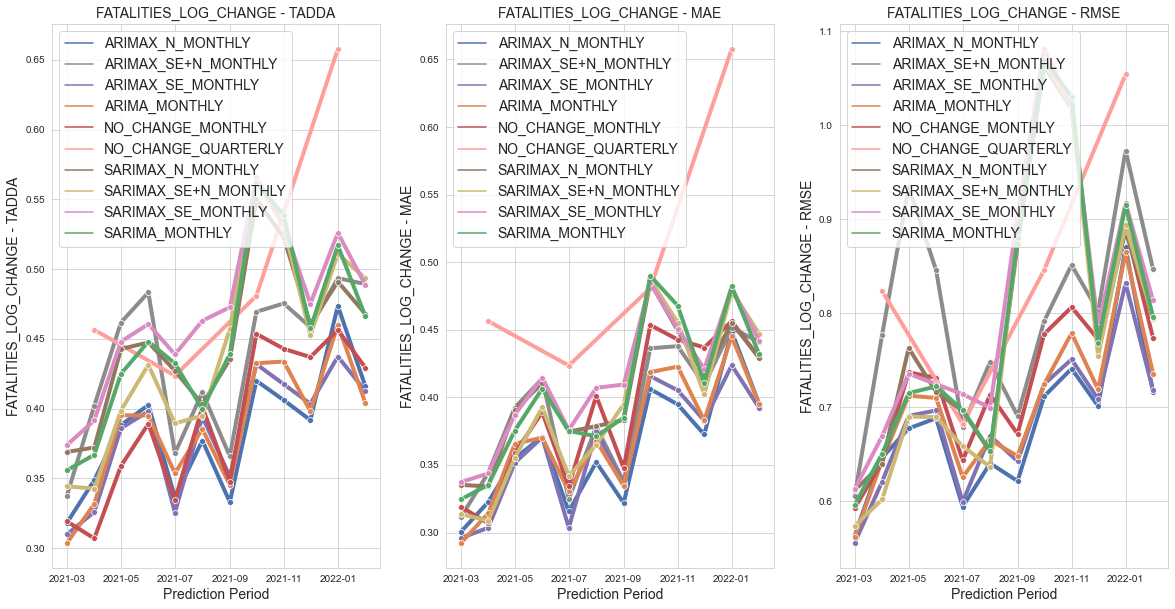

In [25]:
fig = plot_period_loss(predictions_by_month, DEP_VAR, METRICS, "MONTHLY", models_color_palette)
fig.savefig('../img/period_monthly_error.svg', bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

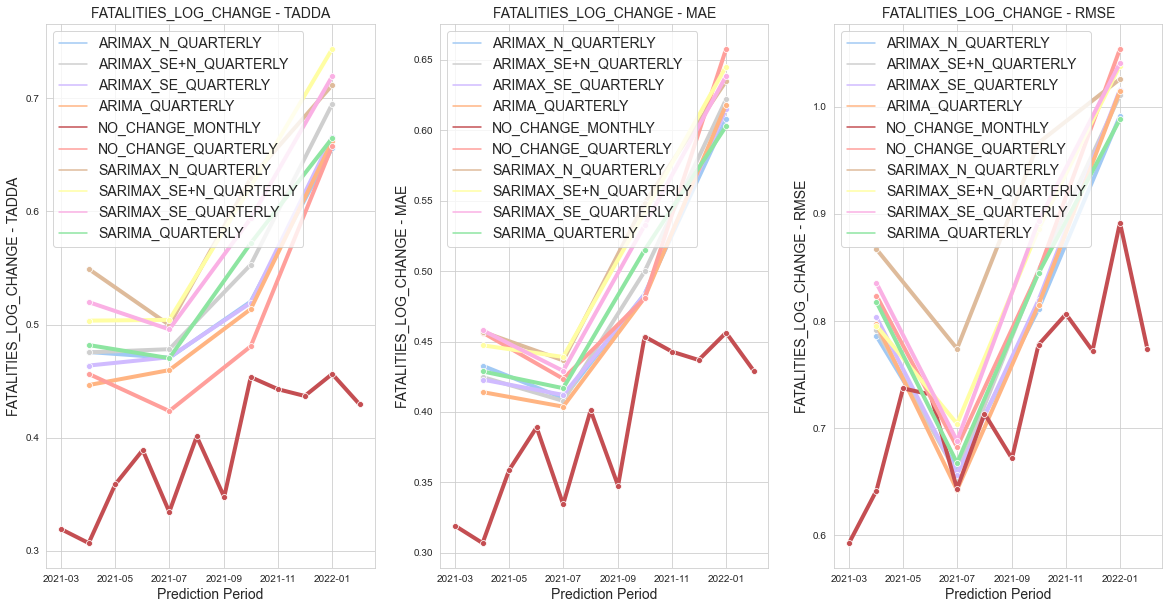

In [26]:
fig = plot_period_loss(predictions_by_month, DEP_VAR, METRICS, "QUARTERLY", models_color_palette)
fig.savefig('../img/period_quarterly_error.svg', bbox_inches="tight")

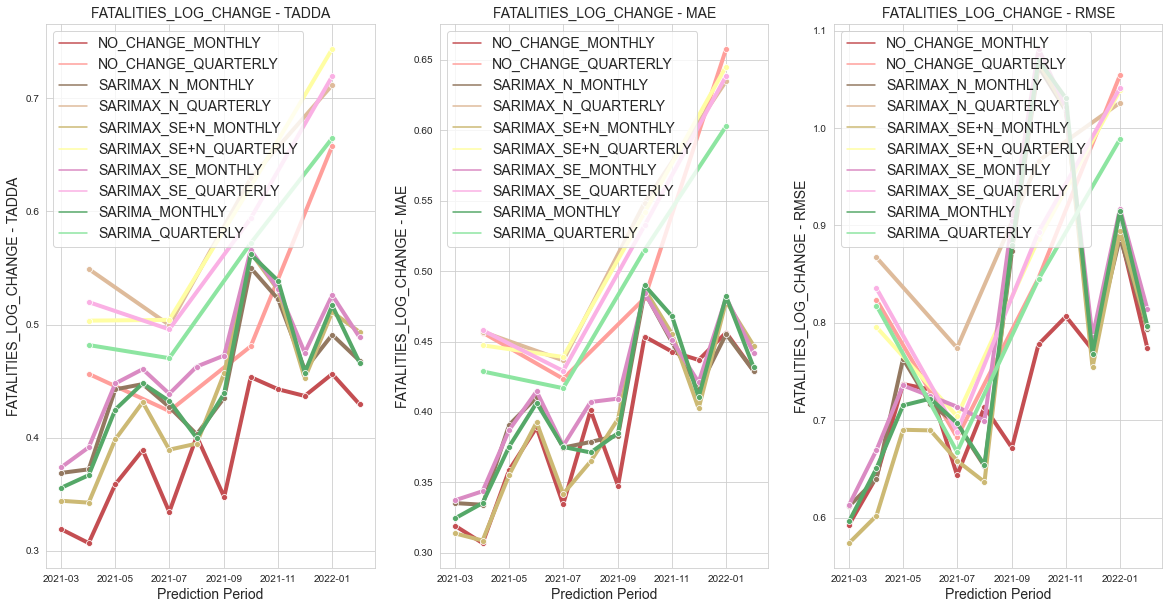

<Figure size 432x288 with 0 Axes>

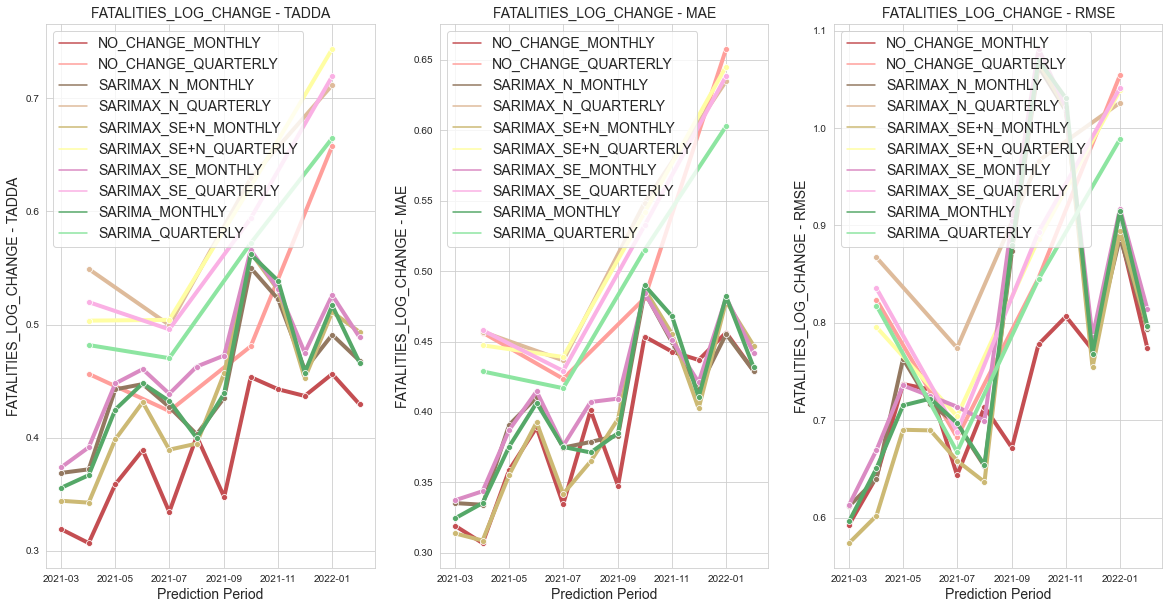

In [27]:
plot_period_loss(predictions_by_month, DEP_VAR, METRICS, "SARIMA", models_color_palette)

plot_period_loss
plot_outcomes_distribution
plot_outcomes_distribution_abs
plot_total_loss
nfl_model_dist_plot
load_gpd_world
plot_errors_on_map
get_prediction_period_counts

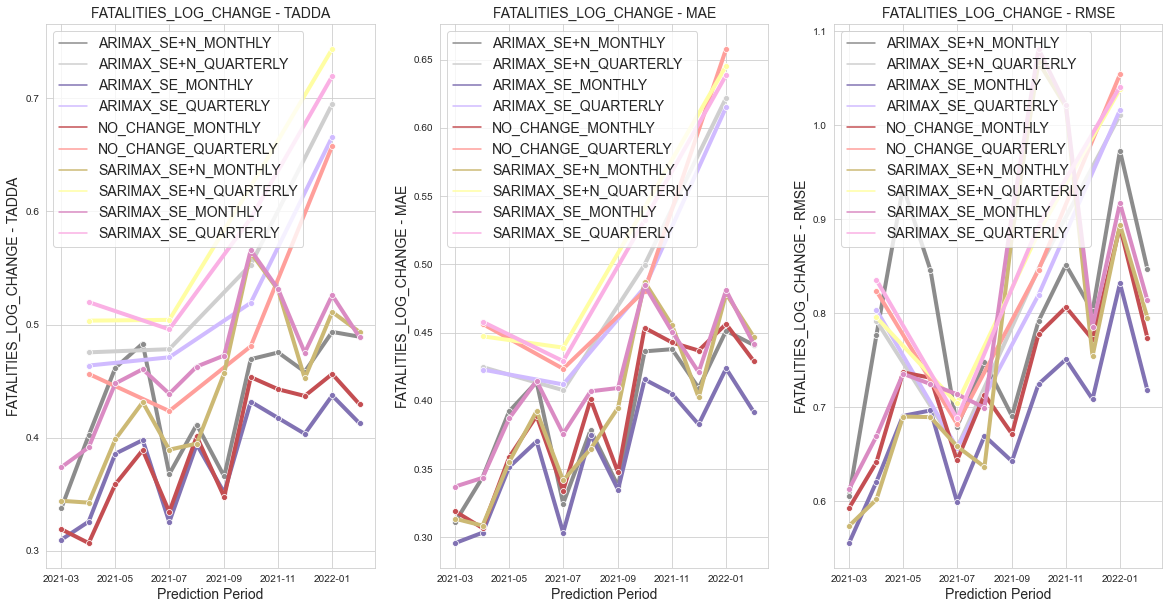

<Figure size 432x288 with 0 Axes>

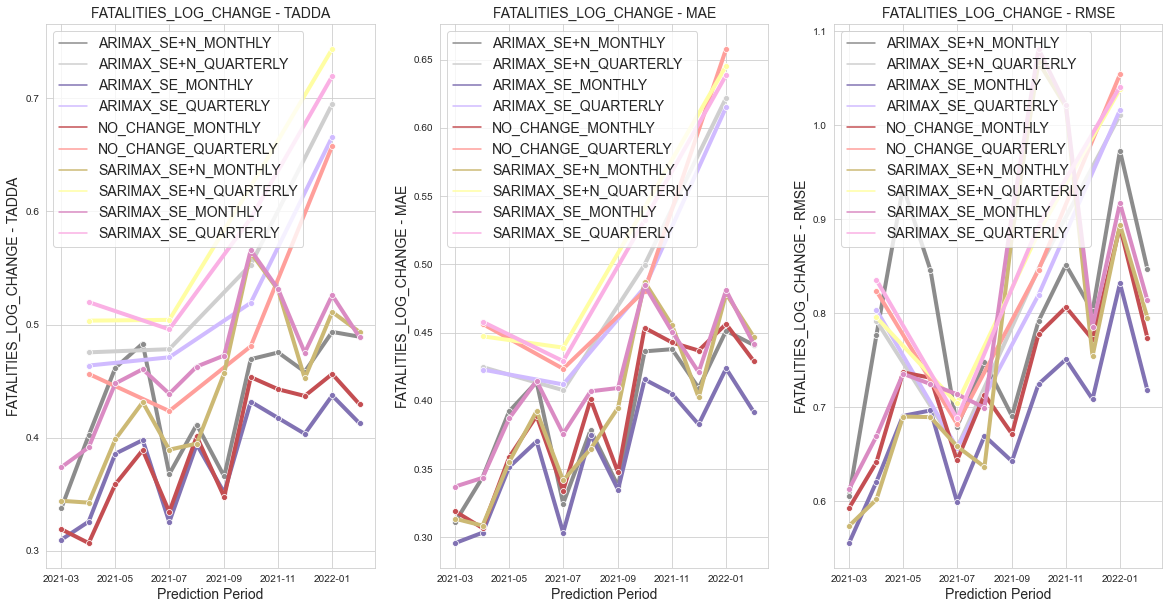

In [28]:
plot_period_loss(predictions_by_month, DEP_VAR, METRICS, "_SE", models_color_palette)

### 1.2 Aggregation by COUNTRY 

In [29]:
# mean
predictions_by_country = all_predictions.groupby(by = ["MODEL", "GID_0"]).mean().reset_index()
# add standard deviations 
predictions_by_country_std = all_predictions.groupby(by = ["MODEL", "GID_0"]).std().reset_index()
predictions_by_country_std = predictions_by_country_std.add_suffix('_STD')
predictions_by_country = pd.concat([predictions_by_country, predictions_by_country_std[["FAT_PRED_STD", "FAT_ACTUAL_STD", "LC(FAT_PRED)_STD", "LC(FAT_ACTUAL)_STD", "TADDA_STD", "MAE_STD", "RMSE_STD"]]], axis = 1)

predictions_by_country

MODEL GID_0      FAT_PRED    FAT_ACTUAL  LC(FAT_PRED)  \
0     ARIMAX_N_MONTHLY   ABW  0.000000e+00  0.000000e+00  0.000000e+00   
1     ARIMAX_N_MONTHLY   AFG           NaN           NaN -3.099148e-02   
2     ARIMAX_N_MONTHLY   AGO  1.474132e+02  1.576436e+04  8.881784e-16   
3     ARIMAX_N_MONTHLY   ALB  0.000000e+00  1.431902e-01  0.000000e+00   
4     ARIMAX_N_MONTHLY   ARE  0.000000e+00  1.590461e+00  0.000000e+00   
...                ...   ...           ...           ...           ...   
2839  SARIMA_QUARTERLY   XKX  0.000000e+00  0.000000e+00  0.000000e+00   
2840  SARIMA_QUARTERLY   YEM           NaN           NaN  7.477745e-03   
2841  SARIMA_QUARTERLY   ZAF  1.670785e+20  3.260452e+51 -2.788741e-01   
2842  SARIMA_QUARTERLY   ZMB  1.908554e+01  2.834511e+02  2.220446e-16   
2843  SARIMA_QUARTERLY   ZWE  5.359815e+01  1.497625e+04  2.220446e-16   

      LC(FAT_ACTUAL)     TADDA       MAE      RMSE  FAT_PRED_STD  \
0           0.000000  0.000000  0.000000  0.000000  0.000000e+00   
1          -0.917136  1.610511  1.600500  3.486671           NaN   
2          -0.332996  0.678408  0.678408  0.689837  0.000000e+00   
3           0.057762  0.057762  0.057762  0.040038  0.000000e+00   
4           0.115525  0.115525  0.115525  0.160151  0.000000e+00   
...              ...       ...       ...       ...           ...   
2839        0.000000  0.000000  0.000000  0.000000  0.000000e+00   
2840       -0.313954  0.346363  0.321432  0.142596           NaN   
2841        0.127297  0.687885  0.484190  0.312127  2.378405e+20   
2842       -0.173287  0.519860  0.519860  0.600566  0.000000e+00   
2843       -0.092332  0.530066  0.530066  0.334531  0.000000e+00   

      FAT_ACTUAL_STD  LC(FAT_PRED)_STD  LC(FAT_ACTUAL)_STD  TADDA_STD  \
0       0.000000e+00          0.000000            0.000000   0.000000   
1                NaN          0.009409            1.724605   0.996868   
2       4.671175e+04          0.000000            0.794722   0.500472   
3       4.960252e-01          0.000000            0.200094   0.200094   
4       5.509520e+00          0.000000            0.400189   0.400189   
...              ...               ...                 ...        ...   
2839    0.000000e+00          0.000000            0.000000   0.000000   
2840             NaN          0.075048            0.272017   0.233487   
2841    6.520904e+51          0.072864            0.473208   0.418376   
2842    5.415295e+02          0.000000            0.872191   0.663638   
2843    2.993126e+04          0.000000            0.659299   0.267236   

       MAE_STD  RMSE_STD  
0     0.000000  0.000000  
1     1.004573  3.382958  
2     0.500472  0.890780  
3     0.200094  0.138695  
4     0.400189  0.554779  
...        ...       ...  
2839  0.000000  0.000000  
2840  0.228844  0.146609  
2841  0.321841  0.360031  
2842  0.663638  0.909483  
2843  0.267236  0.304662  

[2844 rows x 16 columns]

#### Add average ACLED monthly fatalities and monthly fatality standard deviation

In [30]:
acled_by_country

index GID_0   LATITUDE  LONGITUDE  SUM(FATALITIES)  SUM(COUNT_PRO)  \
0        0   ABW  12.523324 -70.027171         0.000000        0.342105   
1        1   AFG  33.998542  67.693358      3158.161290       14.177419   
2        2   AGO  -8.374385  14.289565       476.569536        1.788079   
3        3   AIA  18.214500 -63.051700         0.000000        0.076923   
4        4   ALA  60.101800  19.943500         0.000000        0.115385   
..     ...   ...        ...        ...              ...             ...   
229    229   XNC  35.194706  33.408908         0.040000       11.180000   
230    230   YEM  14.402931  45.020634      1782.697674       33.965116   
231    231   ZAF -28.730783  27.173851         7.864238       49.079470   
232    232   ZMB -14.403255  28.210987         0.993377        3.341060   
233    233   ZWE -18.341495  30.845869         1.754967        5.317881   

     SUM(COUNT_SRZ)  SUM(COUNT_STRA)  SUM(FATALITIES_PRO)  \
0          0.000000         0.052632             0.000000   
1        955.177419        27.725806             1.241935   
2          9.500000         0.615894             0.682119   
3          0.000000         0.038462             0.000000   
4          0.000000         0.000000             0.000000   
..              ...              ...                  ...   
229        0.120000         0.760000             0.000000   
230      742.895349        41.337209             1.418605   
231        3.996689         0.307947             3.980132   
232        1.086093         0.278146             0.407285   
233       14.662252         1.162252             0.281457   

     SUM(FATALITIES_SRZ)  ...  SUM(FATALITIES)_STD_NORM  \
0               0.000000  ...                       NaN   
1            3134.564516  ...                  0.534014   
2             475.887417  ...                  7.172737   
3               0.000000  ...                       NaN   
4               0.000000  ...                       NaN   
..                   ...  ...                       ...   
229             0.020000  ...                  4.948717   
230          1777.197674  ...                  0.411319   
231             3.884106  ...                  1.197553   
232             0.586093  ...                  3.250334   
233             1.473510  ...                  3.003664   

     NUMBER_EVENTS_STD_NORM  SUM(COUNT_PRO)_STD_NORM  SUM(COUNT_SRZ)_STD_NORM  \
0                  1.912123                 2.069866                      NaN   
1                  0.364530                 0.882137                 0.380168   
2                  2.340326                 2.101584                 2.796263   
3                  2.823709                 3.532704                      NaN   
4                  2.823709                 2.823709                      NaN   
..                      ...                      ...                      ...   
229                0.616061                 0.646944                 2.735506   
230                0.245110                 0.977622                 0.255083   
231                1.103899                 1.144819                 1.072939   
232                1.280371                 1.413576                 1.597191   
233                1.253429                 1.111563                 1.683985   

     SUM(COUNT_STRA)_STD_NORM  SUM(FATALITIES_PRO)_STD_NORM  \
0                    4.299591                           NaN   
1                    0.601867                      2.085905   
2                    2.692031                      8.676579   
3                    5.099020                           NaN   
4                         NaN                           NaN   
..                        ...                           ...   
229                  1.369990                           NaN   
230                  0.908743                      3.022727   
231                  2.428630                      1.562941   
232                  4.476447                      4.423281

In [31]:
predictions_by_country = pd.merge(predictions_by_country, acled_by_country, how="left", on=["GID_0"])
predictions_by_country

MODEL GID_0      FAT_PRED    FAT_ACTUAL  LC(FAT_PRED)  \
0     ARIMAX_N_MONTHLY   ABW  0.000000e+00  0.000000e+00  0.000000e+00   
1     ARIMAX_N_MONTHLY   AFG           NaN           NaN -3.099148e-02   
2     ARIMAX_N_MONTHLY   AGO  1.474132e+02  1.576436e+04  8.881784e-16   
3     ARIMAX_N_MONTHLY   ALB  0.000000e+00  1.431902e-01  0.000000e+00   
4     ARIMAX_N_MONTHLY   ARE  0.000000e+00  1.590461e+00  0.000000e+00   
...                ...   ...           ...           ...           ...   
2839  SARIMA_QUARTERLY   XKX  0.000000e+00  0.000000e+00  0.000000e+00   
2840  SARIMA_QUARTERLY   YEM           NaN           NaN  7.477745e-03   
2841  SARIMA_QUARTERLY   ZAF  1.670785e+20  3.260452e+51 -2.788741e-01   
2842  SARIMA_QUARTERLY   ZMB  1.908554e+01  2.834511e+02  2.220446e-16   
2843  SARIMA_QUARTERLY   ZWE  5.359815e+01  1.497625e+04  2.220446e-16   

      LC(FAT_ACTUAL)     TADDA       MAE      RMSE  FAT_PRED_STD  ...  \
0           0.000000  0.000000  0.000000  0.000000  0.000000e+00  ...   
1          -0.917136  1.610511  1.600500  3.486671           NaN  ...   
2          -0.332996  0.678408  0.678408  0.689837  0.000000e+00  ...   
3           0.057762  0.057762  0.057762  0.040038  0.000000e+00  ...   
4           0.115525  0.115525  0.115525  0.160151  0.000000e+00  ...   
...              ...       ...       ...       ...           ...  ...   
2839        0.000000  0.000000  0.000000  0.000000  0.000000e+00  ...   
2840       -0.313954  0.346363  0.321432  0.142596           NaN  ...   
2841        0.127297  0.687885  0.484190  0.312127  2.378405e+20  ...   
2842       -0.173287  0.519860  0.519860  0.600566  0.000000e+00  ...   
2843       -0.092332  0.530066  0.530066  0.334531  0.000000e+00  ...   

      SUM(FATALITIES)_STD_NORM  NUMBER_EVENTS_STD_NORM  \
0                          NaN                1.912123   
1                     0.534014                0.364530   
2                     7.172737                2.340326   
3                     4.948717                0.824071   
4                     7.874008                3.881404   
...                        ...                     ...   
2839                  4.255848                0.511275   
2840                  0.411319                0.245110   
2841                  1.197553                1.103899   
2842                  3.250334                1.280371   
2843                  3.003664                1.253429   

      SUM(COUNT_PRO)_STD_NORM  SUM(COUNT_SRZ)_STD_NORM  \
0                    2.069866                      NaN   
1                    0.882137                 0.380168   
2                    2.101584                 2.796263   
3                    0.836140                 1.531510   
4                    4.470914                 6.943714   
...                       ...                      ...   
2839                 0.572508                 1.351211   
2840                 0.977622                 0.255083   
2841                 1.144819                 1.072939   
2842                 1.413576                 1.597191   
2843                 1.111563                 1.683985   

      SUM(COUNT_STRA)_STD_NORM  SUM(FATALITIES_PRO)_STD_NORM  \
0                     4.299591                           NaN   
1                     0.601867                      2.085905   
2                     2.692031                      8.676579   
3                     2.239980                           NaN   
4                     4.060562                           NaN   
...                        ...                           ...   
2839                  1.430058                           NaN   
2840                  0.908743                      3.022727   
2841                  2.428630                      1.562941   
2842                  4.476447                      4.423281   
2843                  2.672966                      4.049817   

      SUM(FATALITIES_SRZ)_STD_NORM  SUM(FATALITIES_STRA)_STD_NORM  \
0                  

In [32]:
def plot_world_map(df, model_at_display, metric_at_display, range_type="pos", color_continuous_scale="reds"):
    """
    df: pd.DataFrame, predictions_by_country
    model_at_display: string
    metric_at_display: string
    """
    # prepare df for plot
    if model_at_display != "":
        df = df[df["MODEL"] == model_at_display]

    sns.set_style("whitegrid")
    if range_type is "pos":
        range_color = (0, max(df[metric_at_display]))
        color_continuous_midpoint  = np.median(df[metric_at_display])
    else:
        range_color = (min(df[metric_at_display]), max(df[metric_at_display]))
        color_continuous_midpoint  = 0

    fig = px.choropleth(df, locations = "GID_0",
                    color = metric_at_display,
                    hover_name = "GID_0", # column to add to hover information                      
                    color_continuous_scale = color_continuous_scale,
                    color_continuous_midpoint = color_continuous_midpoint,
                    range_color = range_color)

    fig.update_geos(
        resolution=110,
#         showcoastlines=True, coastlinecolor="RebeccaPurple",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="LightBlue",
#         showrivers=True, rivercolor="Blue"
    )
#     fig.update_layout(
# #         title = str(model_at_display) + ": "+metric_at_display+" - Prediction Error by Country",
#         margin = dict(l=0, r=0, t=0, b=0),
#         font = dict(size=10),
#     )
    fig.update_layout(width = 600, height = 300, margin={"r":0,"t":0,"l":0,"b":0})
    
#     print(metric_at_display + " average: " + str(np.mean(df[metric_at_display])))
    fig.show()
    
    return fig

In [33]:
# no_change = predictions_by_country[predictions_by_country["MODEL"] == "NO_CHANGE_MONTHLY"].reset_index(drop=True)
# arima = predictions_by_country[predictions_by_country["MODEL"] == "ARIMAX_SE_MONTHLY"].reset_index(drop=True)

# diff_nochange_arima = arima[["TADDA", "MAE", "RMSE"]].subtract(no_change[["TADDA", "MAE", "RMSE"]])
# diff_nochange_arima["GID_0"] = arima["GID_0"]
# diff_nochange_arima["MODEL"] = "ARIMA-NO_CHANGE_MONTHLY"
# fig = plot_world_map(diff_nochange_arima,"", "TADDA", range_type="both", color_continuous_scale=sns.diverging_palette(220, 20, as_cmap=True))
# pio.write_image(fig, "../img/diff_arima_nochange_error_map.svg", width = 600, height = 300)

https://plotly.com/python/map-configuration/

In [34]:
model_at_display = 'ARIMAX_SE_MONTHLY'
metric_at_display = 'TADDA'

# plot on world map
fig = plot_world_map(predictions_by_country, model_at_display, metric_at_display)
pio.write_image(fig, "../img/ARIMAX_SE_MONTHLY_map_TADDA.svg", width = 600, height = 300)

In [123]:
predictions_by_country[predictions_by_country["MODEL"] == "ARIMAX_SE_MONTHLY"].sort_values(by=["TADDA"], ascending=False)[["GID_0"]+METRICS].reset_index(drop=True)

GID_0     TADDA       MAE      RMSE
0     MMR  2.689890  2.689890  7.451550
1     KEN  2.360835  2.360835  6.009771
2     TUR  1.887999  1.887999  3.990360
3     AFG  1.618997  1.609103  3.523190
4     SAU  1.413274  1.413274  2.127698
..    ...       ...       ...       ...
153   MTQ  0.000000  0.000000  0.000000
154   OMN  0.000000  0.000000  0.000000
155   QAT  0.000000  0.000000  0.000000
156   REU  0.000000  0.000000  0.000000
157   KOR  0.000000  0.000000  0.000000

[158 rows x 4 columns]

### 1.3 Global Mean

In [35]:
predictions_global = all_predictions.groupby(by = ["MODEL"]).mean().reset_index()
predictions_global

MODEL    FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  \
0         ARIMAX_N_MONTHLY         NaN         NaN      0.013710   
1       ARIMAX_N_QUARTERLY         NaN         NaN     -0.055352   
2      ARIMAX_SE+N_MONTHLY         NaN         NaN      0.039547   
3    ARIMAX_SE+N_QUARTERLY         NaN         NaN     -0.024399   
4        ARIMAX_SE_MONTHLY         NaN         NaN     -0.001995   
5      ARIMAX_SE_QUARTERLY         NaN         NaN     -0.023688   
6            ARIMA_MONTHLY         NaN         NaN     -0.005159   
7          ARIMA_QUARTERLY         NaN         NaN     -0.033791   
8        NO_CHANGE_MONTHLY   64.424051   76.226793      0.000000   
9      NO_CHANGE_QUARTERLY  208.398734  209.648734      0.000000   
10       SARIMAX_N_MONTHLY         NaN         NaN      0.056060   
11     SARIMAX_N_QUARTERLY         NaN         NaN      0.026962   
12    SARIMAX_SE+N_MONTHLY         NaN         NaN      0.069157   
13  SARIMAX_SE+N_QUARTERLY         NaN         NaN      0.005814   
14      SARIMAX_SE_MONTHLY         NaN         NaN      0.057357   
15    SARIMAX_SE_QUARTERLY         NaN         NaN     -0.017933   
16          SARIMA_MONTHLY         NaN         NaN      0.066054   
17        SARIMA_QUARTERLY         NaN         NaN     -0.022918   

    LC(FAT_ACTUAL)     TADDA       MAE      RMSE  
0         0.085986  0.384271  0.362981  0.469771  
1        -0.007665  0.530704  0.483652  0.674300  
2         0.085986  0.434636  0.389897  0.643165  
3        -0.007665  0.550403  0.488634  0.699757  
4         0.085986  0.382744  0.362911  0.473129  
5        -0.007665  0.529986  0.483387  0.695345  
6         0.085986  0.386500  0.369966  0.494530  
7        -0.007665  0.520484  0.479328  0.685665  
8         0.085986  0.389663  0.389663  0.538599  
9        -0.007665  0.504649  0.504649  0.742788  
10        0.085986  0.449008  0.403553  0.644135  
11       -0.007665  0.597441  0.519288  0.834489  
12        0.085986  0.442414  0.395239  0.620128  
13       -0.007665  0.593320  0.518380  0.748098  
14        0.085986  0.469589  0.412894  0.670024  
15       -0.007665  0.582246  0.514566  0.763329  
16        0.085986  0.450661  0.404616  0.647323  
17       -0.007665  0.547224  0.490914  0.701296

In [36]:
# plt.rcParams['savefig.dpi'] = 300

In [37]:
def plot_total_loss(total_errors, dep_var, models, metrics, models_color_palette):
        
    # always add baseline models for comparison
    if not "NO_CHANGE_MONTHLY" in models:
        models = models+["NO_CHANGE_MONTHLY"]
    if not "NO_CHANGE_QUARTERLY" in models:
        models = models+["NO_CHANGE_QUARTERLY"]
        
    total_errors = total_errors[total_errors["MODEL"].isin(models)]
    
    rotate_x_degree = 90
    
    sns.set_style("whitegrid")
    
    dpi = None
    
    fig, ax = plt.subplots(1, len(metrics), figsize=(20, 10), dpi=dpi)    
    plt.tight_layout()

    
    x_ticks_labels = list(total_errors.MODEL)
    
    
    for i, metric in enumerate(metrics):
        plot_df = total_errors[['MODEL', metric]]
        sns.barplot(x=plot_df['MODEL'], y=plot_df[metric], hue=plot_df['MODEL'], 
                    dodge=False, palette=models_color_palette, ax=ax[i])
        sns.set(font_scale = 1)
        
        ax[i].set_xticklabels(x_ticks_labels, rotation=rotate_x_degree)

        for p in ax[i].patches:
            ax[i].annotate(format(p.get_height(), '.3f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        
                           
        ax[i].set_title(dep_var + ' - AVG ' + metric, fontsize=18)
        ax[i].set_ylabel("", fontsize=18)
        ax[i].set_xlabel('')
        ax[i].legend([],[], frameon=False)
        
    plt.show()
    return fig

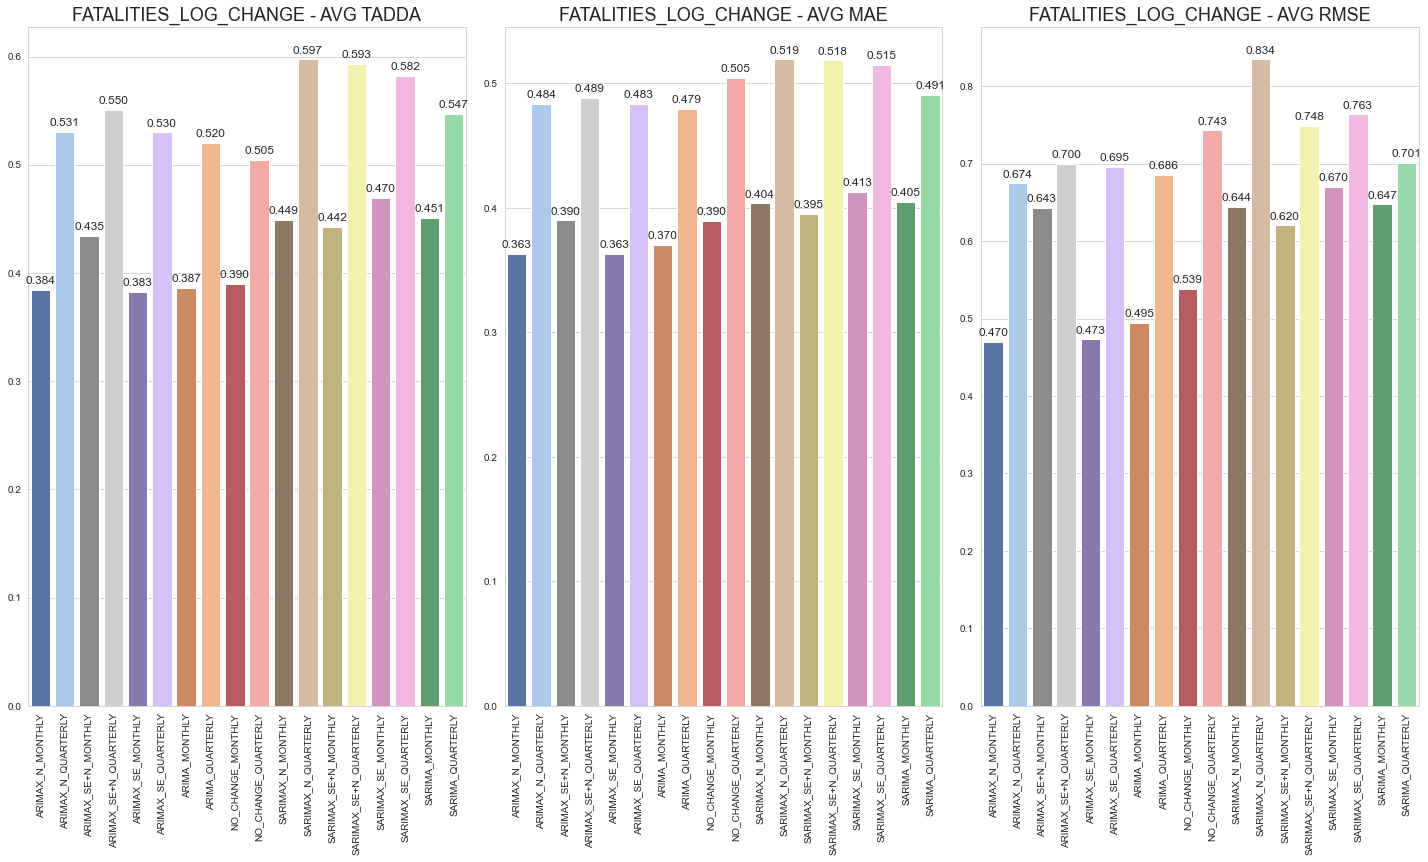

In [38]:
# S-VARIMAX before modification and less hyperparamters:
# 0.437 TADDA, 0.373 MAE, 0.664 MSE

fig = plot_total_loss(predictions_global, DEP_VAR, MODELS, METRICS, models_color_palette)
fig.savefig('../img/global_error.svg',  bbox_inches="tight")

In [39]:
# wie viel % besser ist das beste model im Gegemsatz zu NO_CAHNGE_MONTHLY?
best = predictions_global[predictions_global["MODEL"] == "ARIMAX_SE_MONTHLY"]["TADDA"].iloc[0]
baseline_monthly = predictions_global[predictions_global["MODEL"] == "NO_CHANGE_MONTHLY"]["TADDA"].iloc[0]

vorsprung = (best-baseline_monthly) / baseline_monthly
vorsprung * 100

-1.775749642144923

### 1.4 Composition of the Models

In [40]:
all_predictions["PARAMETER_NAN_COUNT"] = np.where((all_predictions['PARAMETERS'].isnull()), 1, 0) 
all_predictions["1"] = 1
all_predictions

MONTH   FAT_PRED    FAT_ACTUAL  LC(FAT_PRED)  LC(FAT_ACTUAL) GID_0  \
0     2021-03-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
1     2021-04-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
2     2021-05-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
3     2021-06-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
4     2021-07-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
...          ...        ...           ...           ...             ...   ...   
33691 2022-01-01  12.021385      0.000000 -1.146836e-01       -1.386294   ZMB   
33692 2021-04-01  53.598150      6.389056  2.220446e-16       -0.510826   ZWE   
33693 2021-07-01  53.598150      6.389056  2.220446e-16       -0.510826   ZWE   
33694 2021-10-01  53.598150  59873.141715  2.220446e-16        0.875469   ZWE   
33695 2022-01-01  53.598150     19.085537  2.220446e-16       -0.223144   ZWE   

                                              PARAMETERS  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
33691  {'params': [1, (3, 0, 1), (1, 0, 1, 4), 'n'], ...   
33692  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33693  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33694  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33695  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   

                        TIMESTAMP                   MODEL     TADDA       MAE  \
0      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  0.000000  0.000000   
1      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  0.000000  0.000000   
2      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  0.000000  0.000000   
3      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  0.000000  0.000000   
4      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  0.000000  0.000000   
...                           ...                     ...       ...       ...   
33691  2022-10-19 23:59:35.043023  SARIMAX_SE+N_QUARTERLY  1.271611  1.271611   
33692  2022-10-20 00:08:16.609887  SARIMAX_SE+N_QUARTERLY  0.510826  0.510826   
33693  2022-10-20 00:08:16.609887  SARIMAX_SE+N_QUARTERLY  0.510826  0.510826   
33694  2022-10-20 00:08:16.609887  SARIMAX_SE+N_QUARTERLY  0.875469  0.875469   
33695  2022-10-20 00:08:16.609887  SARIMAX_SE+N_QUARTERLY  0.223144  0.223144   

           RMSE  PARAMETER_NAN_COUNT  1  
0      0.000000                    1  1  
1      0.000000                    1  1  
2      0.000000                    1  1  
3      0.000000                    1  1  
4      0.000000                    1  1  
...         ...                  ... ..  
33691  1.616994                    0  1  
33692  0.260943                    0  1  
33693  0.260943                    0  1  
33694  0.766446                    0  1  
33695  0.049793                    0  1  

[22752 rows x 14 columns]

In [41]:
# agg = all_predictions[all_predictions.MODEL == "ARIMAX_SE_MONTHLY"][["GID_0", "PARAMETER_NAN_COUNT", "1"]].groupby(by = ["GID_0"]).sum()
# agg[agg["1"] != 12]

In [42]:
agg = all_predictions[["MODEL", "PARAMETER_NAN_COUNT", "1"]].groupby(by = ["MODEL"]).sum()
agg

PARAMETER_NAN_COUNT     1
MODEL                                            
ARIMAX_N_MONTHLY                          0  1896
ARIMAX_N_QUARTERLY                        0   632
ARIMAX_SE+N_MONTHLY                       0  1896
ARIMAX_SE+N_QUARTERLY                     0   632
ARIMAX_SE_MONTHLY                         0  1896
ARIMAX_SE_QUARTERLY                       0   632
ARIMA_MONTHLY                             0  1896
ARIMA_QUARTERLY                           0   632
NO_CHANGE_MONTHLY                      1896  1896
NO_CHANGE_QUARTERLY                     632   632
SARIMAX_N_MONTHLY                         0  1896
SARIMAX_N_QUARTERLY                       0   632
SARIMAX_SE+N_MONTHLY                      0  1896
SARIMAX_SE+N_QUARTERLY                    0   632
SARIMAX_SE_MONTHLY                        0  1896
SARIMAX_SE_QUARTERLY                      0   632
SARIMA_MONTHLY                            0  1896
SARIMA_QUARTERLY                          0   632

In [43]:
predictions_global["PARAMETER_NAN_COUNT"] = agg["PARAMETER_NAN_COUNT"].values
predictions_global["1"] = agg["1"].values
predictions_global["PCT_NO_CHANGE"] = predictions_global["PARAMETER_NAN_COUNT"] / predictions_global["1"]
predictions_global["PCT_MODEL"] = 1 - predictions_global["PCT_NO_CHANGE"]
predictions_global

MODEL    FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  \
0         ARIMAX_N_MONTHLY         NaN         NaN      0.013710   
1       ARIMAX_N_QUARTERLY         NaN         NaN     -0.055352   
2      ARIMAX_SE+N_MONTHLY         NaN         NaN      0.039547   
3    ARIMAX_SE+N_QUARTERLY         NaN         NaN     -0.024399   
4        ARIMAX_SE_MONTHLY         NaN         NaN     -0.001995   
5      ARIMAX_SE_QUARTERLY         NaN         NaN     -0.023688   
6            ARIMA_MONTHLY         NaN         NaN     -0.005159   
7          ARIMA_QUARTERLY         NaN         NaN     -0.033791   
8        NO_CHANGE_MONTHLY   64.424051   76.226793      0.000000   
9      NO_CHANGE_QUARTERLY  208.398734  209.648734      0.000000   
10       SARIMAX_N_MONTHLY         NaN         NaN      0.056060   
11     SARIMAX_N_QUARTERLY         NaN         NaN      0.026962   
12    SARIMAX_SE+N_MONTHLY         NaN         NaN      0.069157   
13  SARIMAX_SE+N_QUARTERLY         NaN         NaN      0.005814   
14      SARIMAX_SE_MONTHLY         NaN         NaN      0.057357   
15    SARIMAX_SE_QUARTERLY         NaN         NaN     -0.017933   
16          SARIMA_MONTHLY         NaN         NaN      0.066054   
17        SARIMA_QUARTERLY         NaN         NaN     -0.022918   

    LC(FAT_ACTUAL)     TADDA       MAE      RMSE  PARAMETER_NAN_COUNT     1  \
0         0.085986  0.384271  0.362981  0.469771                    0  1896   
1        -0.007665  0.530704  0.483652  0.674300                    0   632   
2         0.085986  0.434636  0.389897  0.643165                    0  1896   
3        -0.007665  0.550403  0.488634  0.699757                    0   632   
4         0.085986  0.382744  0.362911  0.473129                    0  1896   
5        -0.007665  0.529986  0.483387  0.695345                    0   632   
6         0.085986  0.386500  0.369966  0.494530                    0  1896   
7        -0.007665  0.520484  0.479328  0.685665                    0   632   
8         0.085986  0.389663  0.389663  0.538599                 1896  1896   
9        -0.007665  0.504649  0.504649  0.742788                  632   632   
10        0.085986  0.449008  0.403553  0.644135                    0  1896   
11       -0.007665  0.597441  0.519288  0.834489                    0   632   
12        0.085986  0.442414  0.395239  0.620128                    0  1896   
13       -0.007665  0.593320  0.518380  0.748098                    0   632   
14        0.085986  0.469589  0.412894  0.670024                    0  1896   
15       -0.007665  0.582246  0.514566  0.763329                    0   632   
16        0.085986  0.450661  0.404616  0.647323                    0  1896   
17       -0.007665  0.547224  0.490914  0.701296                    0   632   

    PCT_NO_CHANGE  PCT_MODEL  
0             0.0        1.0  
1             0.0        1.0  
2             0.0        1.0  
3             0.0        1.0  
4             0.0        1.0  
5             0.0        1.0  
6             0.0        1.0  
7             0.0        1.0  
8             1.0        0.0  
9             1.0        0.0  
10            0.0        1.0  
11            0.0        1.0  
12            0.0        1.0  
13            0.0        1.0  
14            0.0        1.0  
15            0.0        1.0  
16            0.0        1.0  
17            0.0        1.0

In [44]:
# Latex Code für No-Change Anteile
t1 = predictions_global[["MODEL", "PCT_NO_CHANGE", "PCT_MODEL"]]
t1[["PCT_NO_CHANGE", "PCT_MODEL"]] = (t1[["PCT_NO_CHANGE", "PCT_MODEL"]]*100).round(2).astype("str") + "%"
# t1.to_latex("../latex/models_no_change_pct.tex", index=False)
t1

MODEL PCT_NO_CHANGE PCT_MODEL
0         ARIMAX_N_MONTHLY          0.0%    100.0%
1       ARIMAX_N_QUARTERLY          0.0%    100.0%
2      ARIMAX_SE+N_MONTHLY          0.0%    100.0%
3    ARIMAX_SE+N_QUARTERLY          0.0%    100.0%
4        ARIMAX_SE_MONTHLY          0.0%    100.0%
5      ARIMAX_SE_QUARTERLY          0.0%    100.0%
6            ARIMA_MONTHLY          0.0%    100.0%
7          ARIMA_QUARTERLY          0.0%    100.0%
8        NO_CHANGE_MONTHLY        100.0%      0.0%
9      NO_CHANGE_QUARTERLY        100.0%      0.0%
10       SARIMAX_N_MONTHLY          0.0%    100.0%
11     SARIMAX_N_QUARTERLY          0.0%    100.0%
12    SARIMAX_SE+N_MONTHLY          0.0%    100.0%
13  SARIMAX_SE+N_QUARTERLY          0.0%    100.0%
14      SARIMAX_SE_MONTHLY          0.0%    100.0%
15    SARIMAX_SE_QUARTERLY          0.0%    100.0%
16          SARIMA_MONTHLY          0.0%    100.0%
17        SARIMA_QUARTERLY          0.0%    100.0%

In [45]:
def plot_composition():
    fig, ax = plt.subplots(9, 2, figsize=(10,20))  
    plt.tight_layout()
    sns.set_style("whitegrid")

    plt.title("Percentage of countries with succesful ARIMA-model fit")
    
    for (i, model) in enumerate(MONTHLY_MODELS):
#         print(model)
        x = np.array(predictions_global[predictions_global["MODEL"] == model][["PCT_NO_CHANGE", "PCT_MODEL"]]).flatten()
        labels = ["NO_CHANGE", model]
        colors = sns.color_palette('pastel')[0:2]
#         print(x.shape)
        
        ax[i,0].pie(x = x, labels = labels, colors = colors, autopct='%.0f%%')
        
    for (i, model) in enumerate(QUARTERLY_MODELS):
#         print(model)
        x = np.array(predictions_global[predictions_global["MODEL"] == model][["PCT_NO_CHANGE", "PCT_MODEL"]]).flatten()
        labels = ["NO_CHANGE", model]
        colors = sns.color_palette('pastel')[0:2]
#         print(x.shape)
        
        ax[i,1].pie(x = x, labels = labels, colors = colors, autopct='%.0f%%')
        
    plt.show()

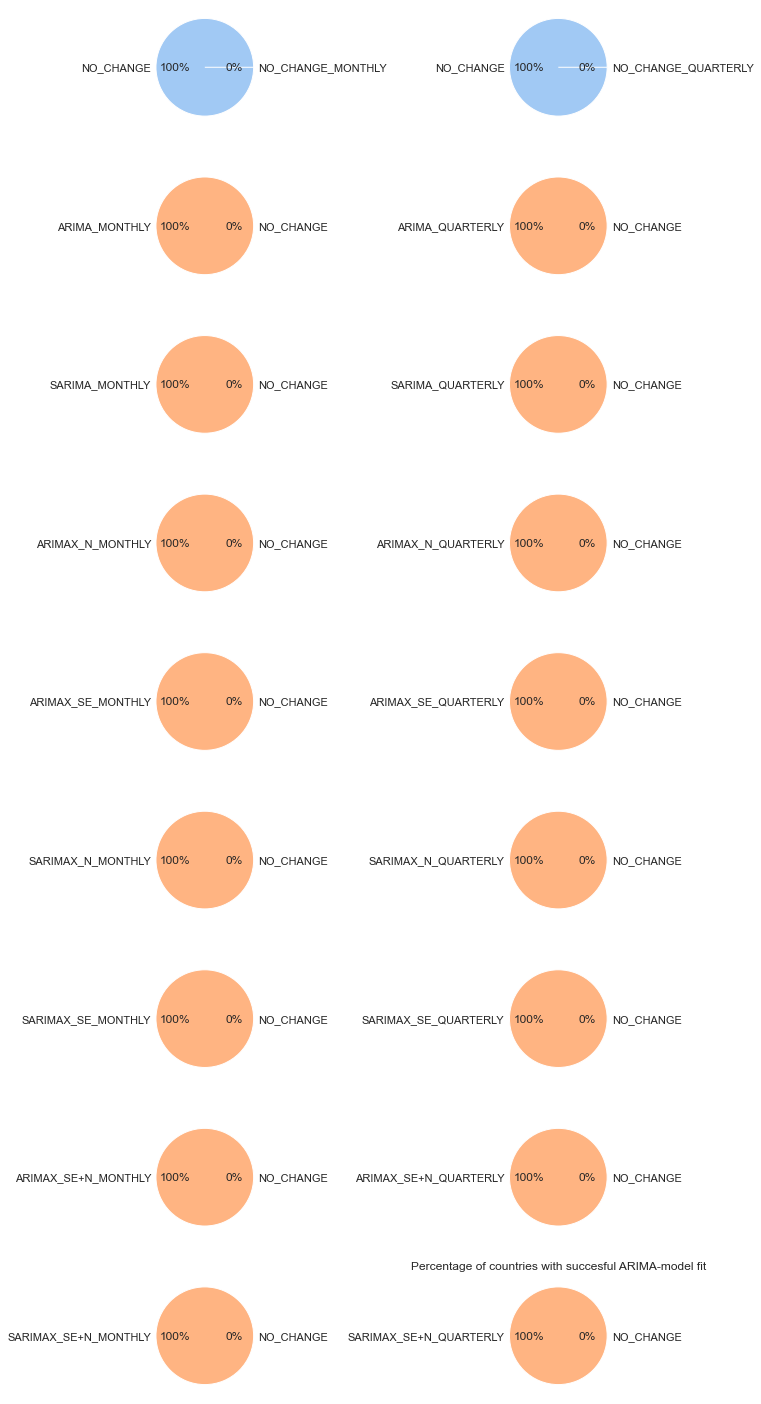

In [46]:
plot_composition()

## 2 Prediction Analysis - Key Findings

    2.1 Outperforming the global performance of the NO_CHANGE-model is hard. CHECK

    2.2 Monthly models clearly outperform quarterly models. CHECK

    2.2 ARIMA outperforms the NO_CHANGE-model in countries with at least 1 conflict fatality. 
    2.4 The best model performs better in countries with little conflict fatalities
    2.5 Countries with a high volatility in conflict fatalities are harder too predict

    2.3 Less complex models yield better prediction results.

    2.6 The model performance depends on the geographic region CHECK

    2.7 Model performance get worse with rising forecast horizon. CHECK
    2.7 ARIMA predictions model can be outperformed for the one-step ahead forecast CHECK

### 2.1 The model performance depends on the geographic region 
Filtern nach FAT type (state/non-state)
Ergebnisse analysieren nach Ländern, Länderkategorien, ausschließen
- Best ARIMA
- NO_CHANGE
- ARIMA-NOCHANGE

In [47]:
no_change = predictions_by_country[predictions_by_country["MODEL"] == "NO_CHANGE_MONTHLY"].reset_index(drop=True)
arima = predictions_by_country[predictions_by_country["MODEL"] == "ARIMAX_SE_MONTHLY"].reset_index(drop=True)

diff_nochange_arima = arima[["TADDA", "MAE", "RMSE"]].subtract(no_change[["TADDA", "MAE", "RMSE"]])
diff_nochange_arima["GID_0"] = arima["GID_0"]
diff_nochange_arima["MODEL"] = "ARIMA-NO_CHANGE_MONTHLY"



print(len(diff_nochange_arima[diff_nochange_arima["TADDA"]<0]))
print(len(diff_nochange_arima[diff_nochange_arima["TADDA"]==0]))
print(len(diff_nochange_arima[diff_nochange_arima["TADDA"]>0]))

print(len(diff_nochange_arima[diff_nochange_arima["TADDA"]<0])/158*100)
print(len(diff_nochange_arima[diff_nochange_arima["TADDA"]==0])/158*100)
print(len(diff_nochange_arima[diff_nochange_arima["TADDA"]>0])/158*100)

28
84
46
17.72151898734177
53.16455696202531
29.11392405063291


In [48]:
2844/18

158.0

In [50]:
28+84+46

158

- aufallende Länder:  Syrien, IRN, RUS, PAK, ECU, PER, KAZ, SDN, TZA, BFA, EGY

In [51]:
fig = plot_world_map(diff_nochange_arima,"", "TADDA", range_type="both", color_continuous_scale="RdYlGn_r")
pio.write_image(fig, "../img/diff_arima_nochange_error_map.svg", width = 600, height = 300)

In [52]:
# fig = plot_world_map(arima,"", "TADDA")
# pio.write_image(fig, "../img/arima_error_map.svg", width = 600, height = 300)

In [53]:
# fig = plot_world_map(no_change,"", "TADDA")
# pio.write_image(fig, "../img/no_change_error_map.svg", width = 600, height = 300)

In [54]:
t1 = arima.sort_values(by=["TADDA"], ascending=True).reset_index(drop=True).head()
t1 = t1[["GID_0", "TADDA"]].round(2)
t1.to_latex("../latex/top5_arima.tex")
t1

GID_0  TADDA
0   ABW    0.0
1   MAC    0.0
2   LCA    0.0
3   KWT    0.0
4   KOR    0.0

In [55]:
t1 = arima.sort_values(by=["TADDA"], ascending=True).reset_index(drop=True).tail()
t1 = t1[["GID_0", "TADDA"]].round(2)
t1.to_latex("../latex/flop5_arima.tex")
t1

GID_0  TADDA
153   SAU   1.41
154   AFG   1.62
155   TUR   1.89
156   KEN   2.36
157   MMR   2.69

In [56]:
t1 = no_change.sort_values(by=["TADDA"], ascending=True).reset_index(drop=True).head()
t1 = t1[["GID_0", "TADDA"]].round(2)
t1.to_latex("../latex/top5_nochange.tex")
t1

GID_0  TADDA
0   ABW    0.0
1   MAC    0.0
2   LCA    0.0
3   KWT    0.0
4   KOR    0.0

In [57]:
t1 = no_change.sort_values(by=["TADDA"], ascending=True).reset_index(drop=True).tail()
t1 = t1[["GID_0", "TADDA"]].round(2)
t1.to_latex("../latex/flop5_nochange.tex")
t1

GID_0  TADDA
153   AFG   1.61
154   RWA   1.67
155   TUR   2.01
156   KEN   2.36
157   MMR   2.69

In [58]:
# t2 = diff_nochange_arima.sort_values(by=["TADDA"], ascending=False).

In [59]:
#### Difference: Best model versus no change

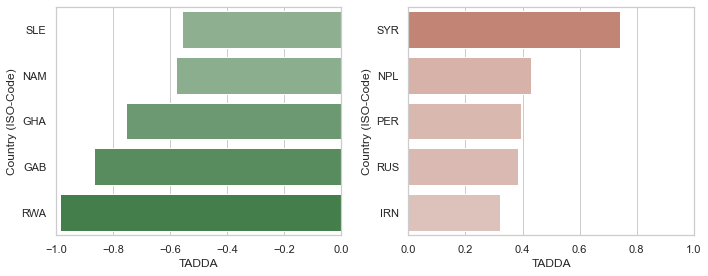

In [60]:
import matplotlib
from matplotlib.colors import TwoSlopeNorm

# dep_var = "FATALITIES_LOG_CHANGE"
# model = "S-VARIMA_MONTHLY"

# Initialize the matplotlib figure
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(10,4))  

for i, metric in enumerate(["TADDA", "TADDA"]):
    
    
    
    if i == 0:
        data = (diff_nochange_arima.sort_values(by=metric, ascending=False)).tail()
        
        # theme and color settings
        norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
        red_green_pal = sns.diverging_palette(130, 20, as_cmap=True)
        colors = [red_green_pal(norm(c)) for c in data[metric]]
        
        sns.barplot(x=metric, y="GID_0", data=data, ci=None, palette=colors, ax=ax[i])
        ax[i].set_xlim(-1,0)

    else:
        data = (diff_nochange_arima.sort_values(by=metric, ascending=False)).head()
        
        # theme and color settings
        norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
        red_green_pal = sns.diverging_palette(130, 20, as_cmap=True)
        colors = [red_green_pal(norm(c)) for c in data[metric]]
        
        sns.barplot(x=metric, y="GID_0", data=data, ci=None, palette=colors, ax=ax[i])
        ax[i].set_xlim(0,1)

        
    ax[i].set_ylabel("Country (ISO-Code)")
        
plt.tight_layout()
fig.savefig('../img/diff_nochange_best_arima_barplot.svg',  bbox_inches="tight")

plt.show()

### REGIONAL

#### UNREGION 2

In [61]:
predictions_by_country_sarimax = predictions_by_country[predictions_by_country.MODEL.isin(STATE_SPACE_MODELS)]
predictions_by_country_nochange_monthly = predictions_by_country[predictions_by_country["MODEL"]== "NO_CHANGE_MONTHLY"]
predictions_by_country_best_model = predictions_by_country[predictions_by_country["MODEL"]== "ARIMAX_SE_MONTHLY"]

In [62]:
predictions_by_country_best_model.TADDA.mean()

0.3827440136889209

In [63]:
predictions_by_country_nochange_monthly.TADDA.mean()

0.3896634612068715

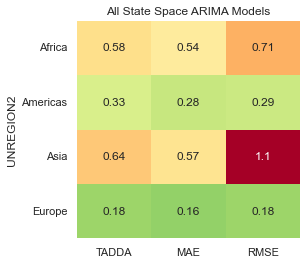

In [64]:
predictions_by_continent_sarimax = predictions_by_country_sarimax.groupby(["UNREGION2"]).mean()

fig, ax = plt.subplots(figsize=(4,4))
center = np.median(predictions_by_continent_sarimax["TADDA"])

sns.heatmap(data=predictions_by_continent_sarimax[METRICS], annot=True, cbar=False, cmap="RdYlGn_r", center=center)
plt.yticks(rotation=0) 
plt.title("All State Space ARIMA Models")
fig.savefig('../img/sarimax_monthly_contintent_regional_error.svg',  bbox_inches="tight")

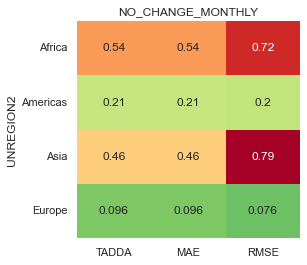

In [65]:
predictions_by_continent_nochange_monthly = predictions_by_country_nochange_monthly.groupby(["UNREGION2"]).mean()

fig, ax = plt.subplots(figsize=(4,4))
center = np.median(predictions_by_continent_nochange_monthly["TADDA"])

sns.heatmap(data=predictions_by_continent_nochange_monthly[METRICS], annot=True, cbar=False, cmap="RdYlGn_r", center=center)
plt.yticks(rotation=0) 
plt.title("NO_CHANGE_MONTHLY")
fig.savefig('../img/nochange_monthly_contintent_regional_error.svg',  bbox_inches="tight")

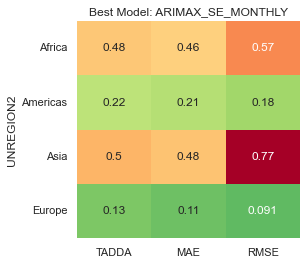

In [66]:
predictions_by_continent_best_model = predictions_by_country_best_model.groupby(["UNREGION2"]).mean()

fig, ax = plt.subplots(figsize=(4,4))
center = np.median(predictions_by_continent_best_model["TADDA"])

sns.heatmap(data=predictions_by_continent_best_model[METRICS], annot=True, cbar=False, cmap="RdYlGn_r", center=center)
plt.yticks(rotation=0) 
plt.title("Best Model: ARIMAX_SE_MONTHLY")

fig.savefig('../img/best_model_monthly_contintent_regional_error.svg',  bbox_inches="tight")

#### UNREGION 1

0.5243865413817212


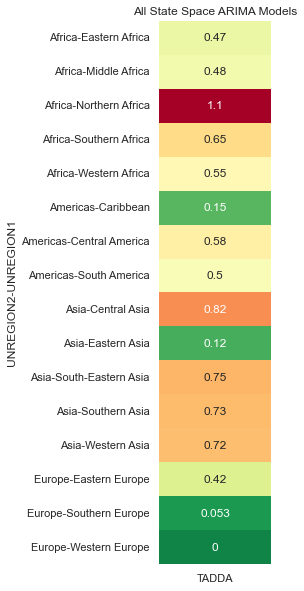

In [67]:
predictions_by_unregion1_sarimax = predictions_by_country_sarimax[METRICS+["UNREGION1", "UNREGION2"]].groupby(["UNREGION2", "UNREGION1"]).mean()

fig, ax = plt.subplots(figsize=(2,10))
center = np.median(predictions_by_unregion1_sarimax["TADDA"])
print(center)
plt.title("All State Space ARIMA Models")
sns.heatmap(data=predictions_by_unregion1_sarimax[["TADDA"]], annot=True, cbar=False, cmap="RdYlGn_r", center=center)
fig.savefig('../img/sarimax_unregion1_error.svg',  bbox_inches="tight")

0.40346923323980655


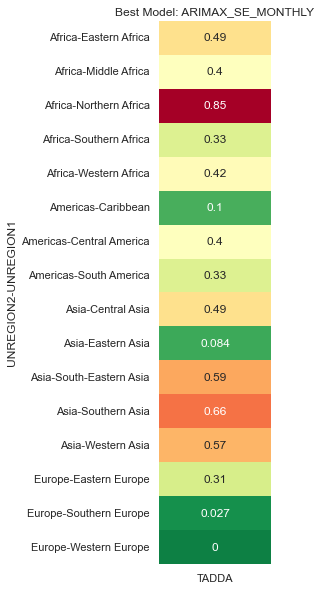

In [68]:
predictions_by_unregion1_best_model = predictions_by_country_best_model[METRICS+["UNREGION1", "UNREGION2"]].groupby(["UNREGION2", "UNREGION1"]).mean()

fig, ax = plt.subplots(figsize=(2,10))
center = np.median(predictions_by_unregion1_best_model["TADDA"])
print(center)
plt.title("Best Model: ARIMAX_SE_MONTHLY")
sns.heatmap(data=predictions_by_unregion1_best_model[["TADDA"]], annot=True, cbar=False, cmap="RdYlGn_r", center=center)
fig.savefig('../img/best_model_unregion1_error.svg',  bbox_inches="tight")

0.43675894214192934


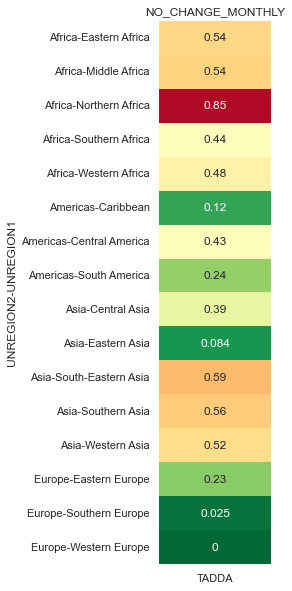

In [69]:
predictions_by_unregion1_nochange_monthly = predictions_by_country_nochange_monthly[METRICS+["UNREGION1", "UNREGION2"]].groupby(["UNREGION2", "UNREGION1"]).mean()

fig, ax = plt.subplots(figsize=(2,10))
center = np.median(predictions_by_unregion1_nochange_monthly["TADDA"])
print(center)
plt.title("NO_CHANGE_MONTHLY")
sns.heatmap(data=predictions_by_unregion1_nochange_monthly[["TADDA"]], annot=True, cbar=False, cmap="RdYlGn_r", center=center)
fig.savefig('../img/nochange_monthly_unregion1_error.svg',  bbox_inches="tight")

#### UNREGION 1 Map: All Monthly State Space ARIMA Models

In [70]:
predictions_by_unregion1_sarimax = predictions_by_unregion1_sarimax.add_suffix("_REGIONAL").reset_index()
predictions_by_country = pd.merge(predictions_by_country, predictions_by_unregion1_sarimax, how="left", on=["UNREGION1", "UNREGION2"])

In [71]:
fig = plot_world_map(predictions_by_country,"", "TADDA_REGIONAL")
pio.write_image(fig, "../img/avg_tadda_regional_map.svg", width = 600, height = 300)

#### Only best model vs. no change baseline

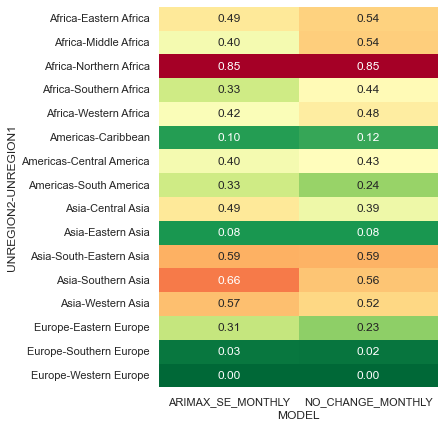

In [72]:
predictions_by_country_vgl = predictions_by_country[predictions_by_country["MODEL"].isin(["ARIMAX_SE_MONTHLY", "NO_CHANGE_MONTHLY"])]
predictions_by_country_vgl = pd.pivot_table(predictions_by_country_vgl, values='TADDA', index=['UNREGION2', 'UNREGION1'], columns=['MODEL'], aggfunc=np.mean)

fig, ax = plt.subplots(figsize=(5,7))
# center = np.mean(predictions_global["RMSE"])

sns.heatmap(data=predictions_by_country_vgl, annot=True, cbar=False,  fmt=".2f", cmap="RdYlGn_r", center=None)
fig.savefig('../img/regional_error_vgl.svg',  bbox_inches="tight")

### 2.2 Monthly models outperform quarterly models

In [73]:
predictions_global_sarimax = predictions_global[predictions_global["MODEL"].isin(STATE_SPACE_MODELS)]
predictions_global_sarimax

MODEL  FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  \
0         ARIMAX_N_MONTHLY       NaN         NaN      0.013710   
1       ARIMAX_N_QUARTERLY       NaN         NaN     -0.055352   
2      ARIMAX_SE+N_MONTHLY       NaN         NaN      0.039547   
3    ARIMAX_SE+N_QUARTERLY       NaN         NaN     -0.024399   
4        ARIMAX_SE_MONTHLY       NaN         NaN     -0.001995   
5      ARIMAX_SE_QUARTERLY       NaN         NaN     -0.023688   
6            ARIMA_MONTHLY       NaN         NaN     -0.005159   
7          ARIMA_QUARTERLY       NaN         NaN     -0.033791   
10       SARIMAX_N_MONTHLY       NaN         NaN      0.056060   
11     SARIMAX_N_QUARTERLY       NaN         NaN      0.026962   
12    SARIMAX_SE+N_MONTHLY       NaN         NaN      0.069157   
13  SARIMAX_SE+N_QUARTERLY       NaN         NaN      0.005814   
14      SARIMAX_SE_MONTHLY       NaN         NaN      0.057357   
15    SARIMAX_SE_QUARTERLY       NaN         NaN     -0.017933   
16          SARIMA_MONTHLY       NaN         NaN      0.066054   
17        SARIMA_QUARTERLY       NaN         NaN     -0.022918   

    LC(FAT_ACTUAL)     TADDA       MAE      RMSE  PARAMETER_NAN_COUNT     1  \
0         0.085986  0.384271  0.362981  0.469771                    0  1896   
1        -0.007665  0.530704  0.483652  0.674300                    0   632   
2         0.085986  0.434636  0.389897  0.643165                    0  1896   
3        -0.007665  0.550403  0.488634  0.699757                    0   632   
4         0.085986  0.382744  0.362911  0.473129                    0  1896   
5        -0.007665  0.529986  0.483387  0.695345                    0   632   
6         0.085986  0.386500  0.369966  0.494530                    0  1896   
7        -0.007665  0.520484  0.479328  0.685665                    0   632   
10        0.085986  0.449008  0.403553  0.644135                    0  1896   
11       -0.007665  0.597441  0.519288  0.834489                    0   632   
12        0.085986  0.442414  0.395239  0.620128                    0  1896   
13       -0.007665  0.593320  0.518380  0.748098                    0   632   
14        0.085986  0.469589  0.412894  0.670024                    0  1896   
15       -0.007665  0.582246  0.514566  0.763329                    0   632   
16        0.085986  0.450661  0.404616  0.647323                    0  1896   
17       -0.007665  0.547224  0.490914  0.701296                    0   632   

    PCT_NO_CHANGE  PCT_MODEL  
0             0.0        1.0  
1             0.0        1.0  
2             0.0        1.0  
3             0.0        1.0  
4             0.0        1.0  
5             0.0        1.0  
6             0.0        1.0  
7             0.0        1.0  
10            0.0        1.0  
11            0.0        1.0  
12            0.0        1.0  
13            0.0        1.0  
14            0.0        1.0  
15            0.0        1.0  
16            0.0        1.0  
17            0.0        1.0

In [74]:
predictions_global_sarimax["TEMPORAL_AGGREGATION"] = ["MONTHLY" if x in MONTHLY_MODELS else "QUARTERLY" for x in predictions_global_sarimax["MODEL"]]

In [75]:
predictions_global["TEMPORAL_AGGREGATION"] = ["MONTHLY" if x in MONTHLY_MODELS else "QUARTERLY" for x in predictions_global["MODEL"]]

In [76]:
global_pred_temp_agg = predictions_global_sarimax[["TEMPORAL_AGGREGATION"]+METRICS].groupby("TEMPORAL_AGGREGATION").mean()
global_pred_temp_agg

TADDA       MAE      RMSE
TEMPORAL_AGGREGATION                              
MONTHLY               0.424978  0.387757  0.582776
QUARTERLY             0.556476  0.497268  0.725285

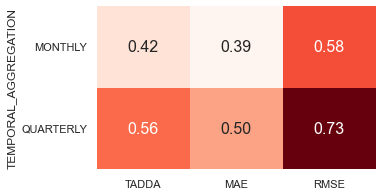

In [77]:
fig, ax = plt.subplots(figsize=(5,3))
# sns.heatmap(data=global_pred_temp_agg, annot=True, cbar=False, cmap="Reds", vmin=0.2, vmax=0.6)
sns.heatmap(data=global_pred_temp_agg, annot=True, fmt=".2f", cbar=False, cmap="Reds", annot_kws={"size": 16})
plt.yticks(rotation=0) 

fig.savefig('../img/monthly_quarterly_error.svg',  bbox_inches="tight")

In [78]:
# Relative difference in percent
(global_pred_temp_agg.loc["QUARTERLY"] - global_pred_temp_agg.loc["MONTHLY"]) / global_pred_temp_agg.loc["QUARTERLY"]*100

TADDA    23.630511
MAE      22.022605
RMSE     19.648743
dtype: float64

### 2.3 Less complex (seasonality) models yield better prediction results
S, X, V ---> X LOCV
Reason: wrong seasonal periodicity or no seasonality in data --> see conclusion better seasonality detection
- overfitting?

In [79]:
predictions_global_sarimax["SEASONAL"] = ["SEASONAL" if x in SEASONAL_MODELS else "NON_SEASONAL" for x in predictions_global_sarimax["MODEL"]]

In [80]:
predictions_global["SEASONAL"] = ["SEASONAL" if x in SEASONAL_MODELS else "NON_SEASONAL" for x in predictions_global["MODEL"]]

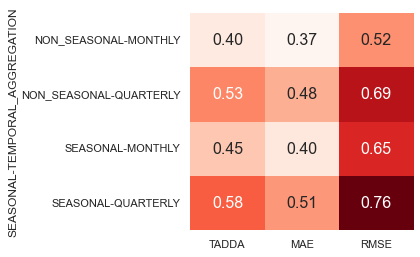

In [81]:
predictions_global_by_seasonal = predictions_global_sarimax[["SEASONAL", "TEMPORAL_AGGREGATION"]+METRICS].groupby(["SEASONAL", "TEMPORAL_AGGREGATION"]).mean()

fig, ax = plt.subplots(figsize = (4,4))

sns.heatmap(data=predictions_global_by_seasonal[METRICS], annot=True, cbar=False, fmt=".2f", cmap="Reds", annot_kws={"size": 16})
plt.yticks(rotation=0) 

fig.savefig('../img/seasonal_error.svg',  bbox_inches="tight")

In [82]:
100*(0.4-0.45)/0.4

-12.499999999999996

In [83]:
100*(0.37-0.40)/0.37

-8.108108108108116

In [84]:
100*(0.52-0.65)/0.52

-25.0

#### Performance by Complexity Level

In [85]:
predictions_global_sarimax["TIER"] = ["TIER 0" if x in TIER_0 else
                              "TIER 1" if x in TIER_1 else
                              "TIER 2" if x in TIER_2 else
                              "TIER 3" if x in TIER_3 else                              
                              "NO_CHANGE" for x in predictions_global_sarimax["MODEL"]]
# predictions_global[["TIER", "MODEL", "TADDA"]].set_index(["TIER", "MODEL"])

In [86]:
predictions_global["TIER"] = ["TIER 0" if x in TIER_0 else
                              "TIER 1" if x in TIER_1 else
                              "TIER 2" if x in TIER_2 else
                              "TIER 3" if x in TIER_3 else                              
                              "NO_CHANGE" for x in predictions_global["MODEL"]]
# predictions_global[["TIER", "MODEL", "TADDA"]].set_index(["TIER", "MODEL"])

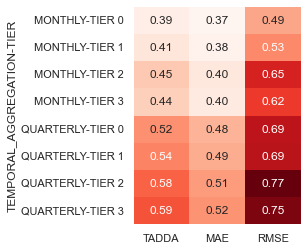

In [87]:
predictions_global_by_tier_sarimax = predictions_global_sarimax[["TEMPORAL_AGGREGATION", "TIER"]+METRICS].groupby(["TEMPORAL_AGGREGATION", "TIER"]).mean()

fig, ax = plt.subplots(figsize = (3,4))
sns.heatmap(data=predictions_global_by_tier_sarimax[METRICS], fmt=".2f", annot=True, cbar=False, cmap="Reds")
fig.savefig('../img/tier_error.svg',  bbox_inches="tight")

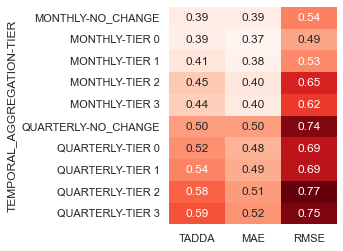

In [88]:
predictions_global_by_tier = predictions_global[["TEMPORAL_AGGREGATION", "TIER"]+METRICS].groupby(["TEMPORAL_AGGREGATION", "TIER"]).mean()

fig, ax = plt.subplots(figsize = (3,4))
sns.heatmap(data=predictions_global_by_tier[METRICS], fmt=".2f", annot=True, cbar=False, cmap="Reds")
fig.savefig('../img/tier_error_with_no_change.svg',  bbox_inches="tight")

#### Performance by Complexity Level excluding seasonal models

In [89]:
predictions_global_sarimax_ns = predictions_global_sarimax[predictions_global_sarimax["SEASONAL"] == "NON_SEASONAL"]
# predictions_global_sarimax_ns

In [90]:
predictions_global_ns = predictions_global[predictions_global["SEASONAL"] == "NON_SEASONAL"]
# predictions_global_ns

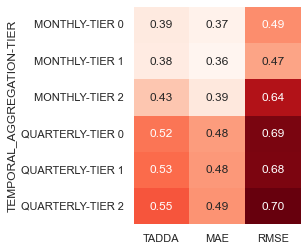

In [91]:
predictions_global_by_tier_sarimax_ns = predictions_global_sarimax_ns[["TEMPORAL_AGGREGATION", "TIER"]+METRICS].groupby(["TEMPORAL_AGGREGATION", "TIER"]).mean()

fig, ax = plt.subplots(figsize = (3,4))
sns.heatmap(data=predictions_global_by_tier_sarimax_ns[METRICS], fmt=".2f", annot=True, cmap="Reds", cbar=False)
fig.savefig('../img/non_seasonal_tier_error.svg',  bbox_inches="tight")

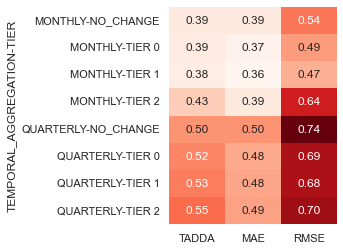

In [92]:
predictions_global_by_tier_ns = predictions_global_ns[["TEMPORAL_AGGREGATION", "TIER"]+METRICS].groupby(["TEMPORAL_AGGREGATION", "TIER"]).mean()

fig, ax = plt.subplots(figsize = (3,4))
sns.heatmap(data=predictions_global_by_tier_ns[METRICS], fmt=".2f", annot=True, cmap="Reds", cbar=False)
fig.savefig('../img/non_seasonal_tier_error_with_no_change.svg',  bbox_inches="tight")

### 2.4 The best model performs better in countries with little conflict fatalities

#### Non-conflict countries
- fat=0, pred=0 --> error=0

In [93]:
ncc_preds = predictions_by_country[predictions_by_country["GID_0"].isin(NON_CONFLICT_COUNTRIES)]
ncc_preds

MODEL GID_0  FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  \
0     ARIMAX_N_MONTHLY   ABW       0.0         0.0           0.0   
11    ARIMAX_N_MONTHLY   BES       0.0         0.0           0.0   
14    ARIMAX_N_MONTHLY   BGR       0.0         0.0           0.0   
18    ARIMAX_N_MONTHLY   BLM       0.0         0.0           0.0   
33    ARIMAX_N_MONTHLY   CPV       0.0         0.0           0.0   
...                ...   ...       ...         ...           ...   
2810  SARIMA_QUARTERLY   SHN       0.0         0.0           0.0   
2819  SARIMA_QUARTERLY   SXM       0.0         0.0           0.0   
2820  SARIMA_QUARTERLY   SYC       0.0         0.0           0.0   
2822  SARIMA_QUARTERLY   TCA       0.0         0.0           0.0   
2831  SARIMA_QUARTERLY   TWN       0.0         0.0           0.0   

      LC(FAT_ACTUAL)  TADDA  MAE  RMSE  FAT_PRED_STD  ...  \
0                0.0    0.0  0.0   0.0           0.0  ...   
11               0.0    0.0  0.0   0.0           0.0  ...   
14               0.0    0.0  0.0   0.0           0.0  ...   
18               0.0    0.0  0.0   0.0           0.0  ...   
33               0.0    0.0  0.0   0.0           0.0  ...   
...              ...    ...  ...   ...           ...  ...   
2810             0.0    0.0  0.0   0.0           0.0  ...   
2819             0.0    0.0  0.0   0.0           0.0  ...   
2820             0.0    0.0  0.0   0.0           0.0  ...   
2822             0.0    0.0  0.0   0.0           0.0  ...   
2831             0.0    0.0  0.0   0.0           0.0  ...   

      SUM(COUNT_SRZ)_STD_NORM  SUM(COUNT_STRA)_STD_NORM  \
0                         NaN                  4.299591   
11                        NaN                 17.378147   
14                   3.184385                  2.430697   
18                        NaN                       NaN   
33                   9.999889                 17.378147   
...                       ...                       ...   
2810                      NaN                       NaN   
2819                 7.071068                  5.227262   
2820                      NaN                  9.999889   
2822                      NaN                  2.027763   
2831                 4.948717                  3.212080   

      SUM(FATALITIES_PRO)_STD_NORM  SUM(FATALITIES_SRZ)_STD_NORM  \
0                              NaN                           NaN   
11                             NaN                           NaN   
14                             NaN                           NaN   
18                             NaN                           NaN   
33                             NaN                           NaN   
...                            ...                           ...   
2810                           NaN                           NaN   
2819                           NaN                           NaN   
2820                           NaN                           NaN   
2822                           NaN                           NaN   
2831                           NaN                           NaN   

      SUM(FATALITIES_STRA)_STD_NORM       UNREGION1  UNREGION2  \
0                               NaN       Caribbean   Americas   
11                              NaN       Caribbean   Americas   
14                              NaN  Eastern Europe     Europe   
18                              NaN       Caribbean   Americas   
33                              NaN  Western Africa     Africa   
...                             ...             ...        ...   
2810                            NaN  Western Africa     Africa   
2819                            NaN       Caribbean   Americas   
2820                            NaN  Eastern Africa     Africa   
2822                            NaN       Caribbean   Americas   
2831                            NaN    Eastern Asia       Asia   

      TADDA_REGIONAL  MAE_REGIONAL  RMSE_REGIONAL  
0           0.148591      0.132856       0.106793  
11          0.148591      0.132856       0.1

In [94]:
ncc_preds_total = ncc_preds.groupby("MODEL").mean().reset_index()
ncc_preds_total

MODEL  FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  \
0         ARIMAX_N_MONTHLY       0.0         0.0           0.0   
1       ARIMAX_N_QUARTERLY       0.0         0.0           0.0   
2      ARIMAX_SE+N_MONTHLY       0.0         0.0           0.0   
3    ARIMAX_SE+N_QUARTERLY       0.0         0.0           0.0   
4        ARIMAX_SE_MONTHLY       0.0         0.0           0.0   
5      ARIMAX_SE_QUARTERLY       0.0         0.0           0.0   
6            ARIMA_MONTHLY       0.0         0.0           0.0   
7          ARIMA_QUARTERLY       0.0         0.0           0.0   
8        NO_CHANGE_MONTHLY       0.0         0.0           0.0   
9      NO_CHANGE_QUARTERLY       0.0         0.0           0.0   
10       SARIMAX_N_MONTHLY       0.0         0.0           0.0   
11     SARIMAX_N_QUARTERLY       0.0         0.0           0.0   
12    SARIMAX_SE+N_MONTHLY       0.0         0.0           0.0   
13  SARIMAX_SE+N_QUARTERLY       0.0         0.0           0.0   
14      SARIMAX_SE_MONTHLY       0.0         0.0           0.0   
15    SARIMAX_SE_QUARTERLY       0.0         0.0           0.0   
16          SARIMA_MONTHLY       0.0         0.0           0.0   
17        SARIMA_QUARTERLY       0.0         0.0           0.0   

    LC(FAT_ACTUAL)  TADDA  MAE  RMSE  FAT_PRED_STD  FAT_ACTUAL_STD  ...  \
0              0.0    0.0  0.0   0.0           0.0             0.0  ...   
1              0.0    0.0  0.0   0.0           0.0             0.0  ...   
2              0.0    0.0  0.0   0.0           0.0             0.0  ...   
3              0.0    0.0  0.0   0.0           0.0             0.0  ...   
4              0.0    0.0  0.0   0.0           0.0             0.0  ...   
5              0.0    0.0  0.0   0.0           0.0             0.0  ...   
6              0.0    0.0  0.0   0.0           0.0             0.0  ...   
7              0.0    0.0  0.0   0.0           0.0             0.0  ...   
8              0.0    0.0  0.0   0.0           0.0             0.0  ...   
9              0.0    0.0  0.0   0.0           0.0             0.0  ...   
10             0.0    0.0  0.0   0.0           0.0             0.0  ...   
11             0.0    0.0  0.0   0.0           0.0             0.0  ...   
12             0.0    0.0  0.0   0.0           0.0             0.0  ...   
13             0.0    0.0  0.0   0.0           0.0             0.0  ...   
14             0.0    0.0  0.0   0.0           0.0             0.0  ...   
15             0.0    0.0  0.0   0.0           0.0             0.0  ...   
16             0.0    0.0  0.0   0.0           0.0             0.0  ...   
17             0.0    0.0  0.0   0.0           0.0             0.0  ...   

    NUMBER_EVENTS_STD_NORM  SUM(COUNT_PRO)_STD_NORM  SUM(COUNT_SRZ)_STD_NORM  \
0                 3.823403                 4.039286                 5.634239   
1                 3.823403                 4.039286                 5.634239   
2                 3.823403                 4.039286                 5.634239   
3                 3.823403                 4.039286                 5.634239   
4                 3.823403                 4.039286                 5.634239   
5                 3.823403                 4.039286                 5.634239   
6                 3.823403                 4.039286                 5.634239   
7                 3.823403                 4.039286                 5.634239   
8                 3.823403                 4.039286                 5.634239   
9                 3.823403                 4.039286                 5.634239   
10                3.823403                 4.039286                 5.634239   
11                3.823403                 4.039286                 5.634239   
12                3.823403                 4.039286                 5.634239   
13                3.823403                 4.039286                 5.634239   
14                3.823403                 4.039286                 5.634239   
15                3.823403                 4.039286         

In [95]:
len(NON_CONFLICT_COUNTRIES)/len(COI)

0.17721518987341772

In [96]:
len(COI)

158

In [97]:
len(NON_CONFLICT_COUNTRIES)

28

In [98]:
fig = plot_world_map(ncc_preds,"", "SUM(FATALITIES)/POP")

###### Conflict countries

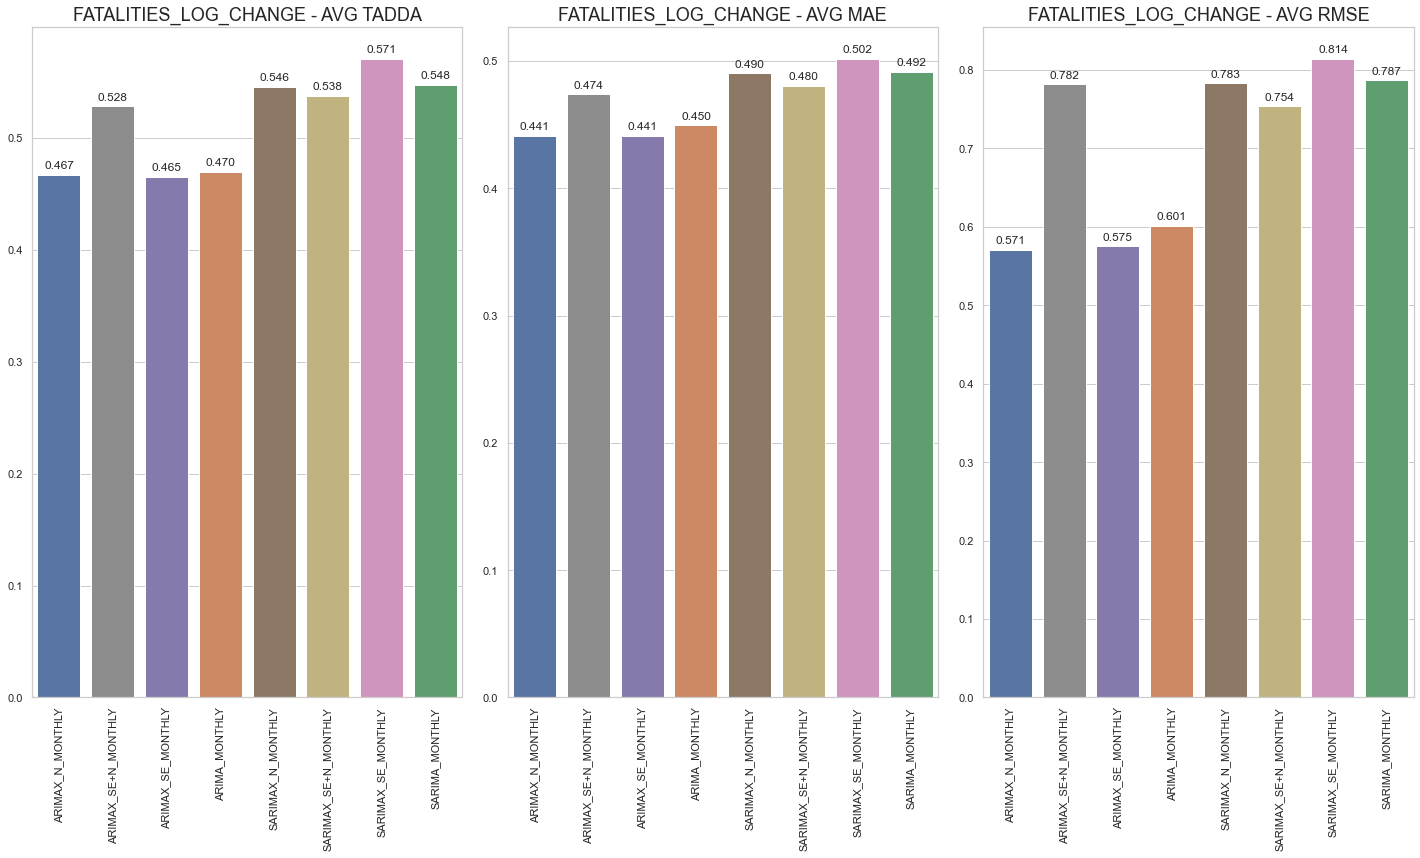

In [99]:
cc_preds_sarimax = predictions_by_country_sarimax[predictions_by_country_sarimax["GID_0"].isin(CONFLICT_COUNTRIES)]
cc_preds_total_sarimax = cc_preds_sarimax.groupby("MODEL").mean().reset_index()
plot_total_loss(cc_preds_total_sarimax, DEP_VAR, MONTHLY_MODELS, METRICS, models_color_palette)
plt.show()

#### No-conflict countries distort model performances
Average model performance in conflict countries decreases by 21.54% in comparison to global average performance

<AxesSubplot:ylabel='MODEL'>

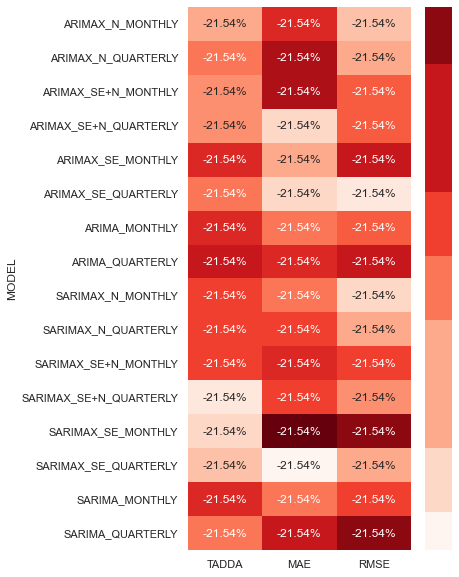

In [100]:
df1 = cc_preds_total_sarimax[["MODEL"]+METRICS].set_index("MODEL", drop=False) 
df2 = predictions_global_sarimax.set_index("MODEL", drop=False)

diff_total_cc_pct_sarimax = (df2[METRICS].subtract(df1[METRICS])).divide(df2[METRICS])
diff_total_cc_pct_sarimax
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(data=diff_total_cc_pct_sarimax[METRICS], fmt=".2%", annot=True, cmap="Reds", )

#### LOW_CONFLICT COUNTRIES? AVG FAT PER 1 MIO inahbitants < 5 ?

In [101]:
lcc_preds = predictions_by_country[predictions_by_country["GID_0"].isin(LOW_CONFLICT_COUNTRIES)]

fig = plot_world_map(lcc_preds,"", "SUM(FATALITIES)/POP")

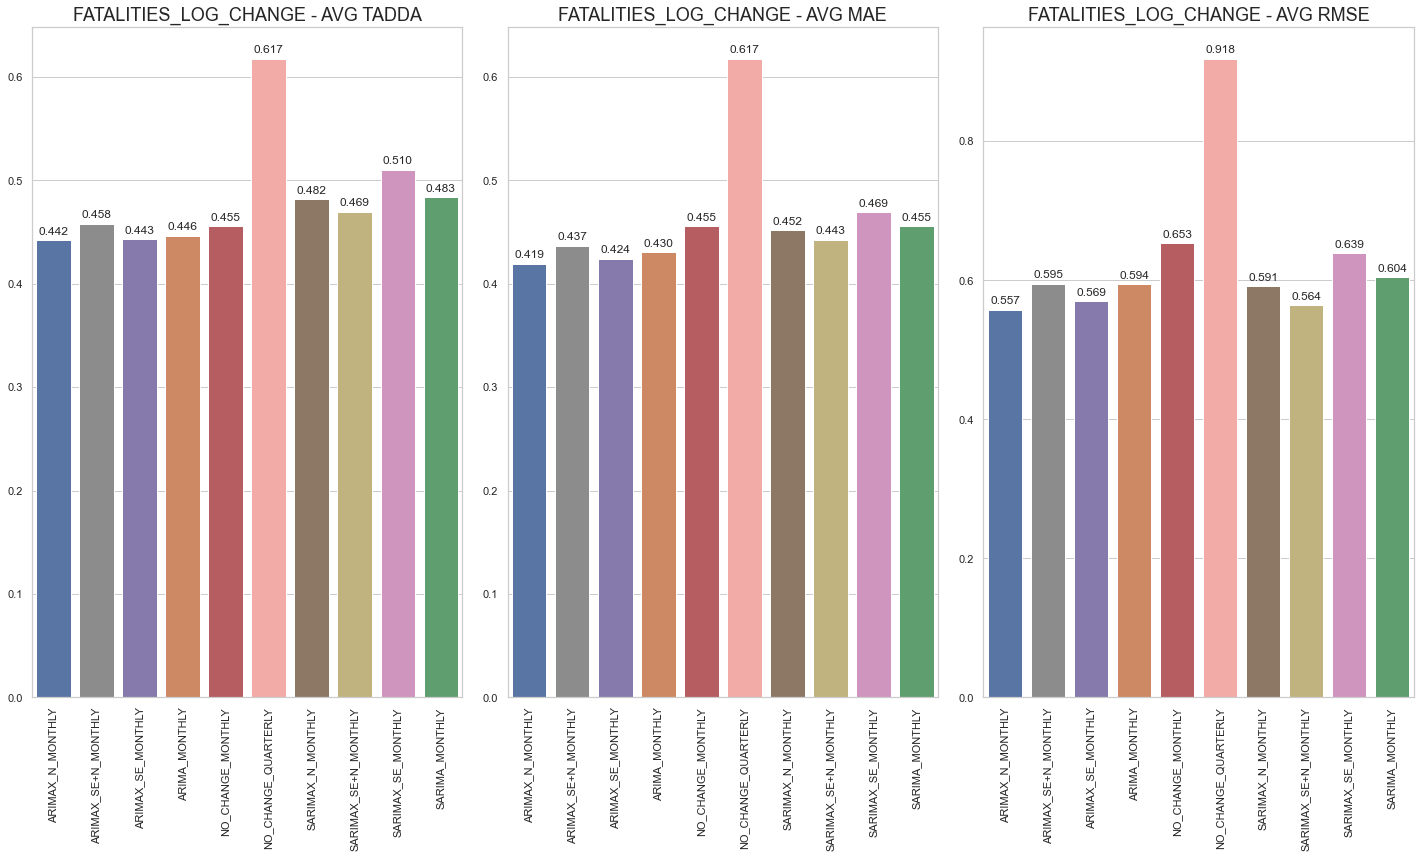

In [102]:
lcc_preds_total = lcc_preds.groupby("MODEL").mean().reset_index()
fig = plot_total_loss(lcc_preds_total, DEP_VAR, MONTHLY_MODELS, METRICS, models_color_palette)
fig.savefig('../img/low_conflict_countries.svg',  bbox_inches="tight")

#### HIGH == over 5 average monthly fatalities per 1mio inhabitants

In [103]:
hcc_preds = predictions_by_country[predictions_by_country["GID_0"].isin(HIGH_CONFLICT_COUNTRIES)]

fig = plot_world_map(hcc_preds,"", "SUM(FATALITIES)/POP")

In [104]:
hcc_preds[["GID_0"]].drop_duplicates().T

1    2    8    9    20   25   29   45   57   61   ...  91   114  115  \
GID_0  AFG  AGO  AZE  BDI  BLZ  CAF  COD  ERI  GTM  HND  ...  MEX  PRI  PSE   

       122  126  127  129  135  142  154  
GID_0  SDN  SLV  SOM  SSD  SYR  TTO  YEM  

[1 rows x 23 columns]

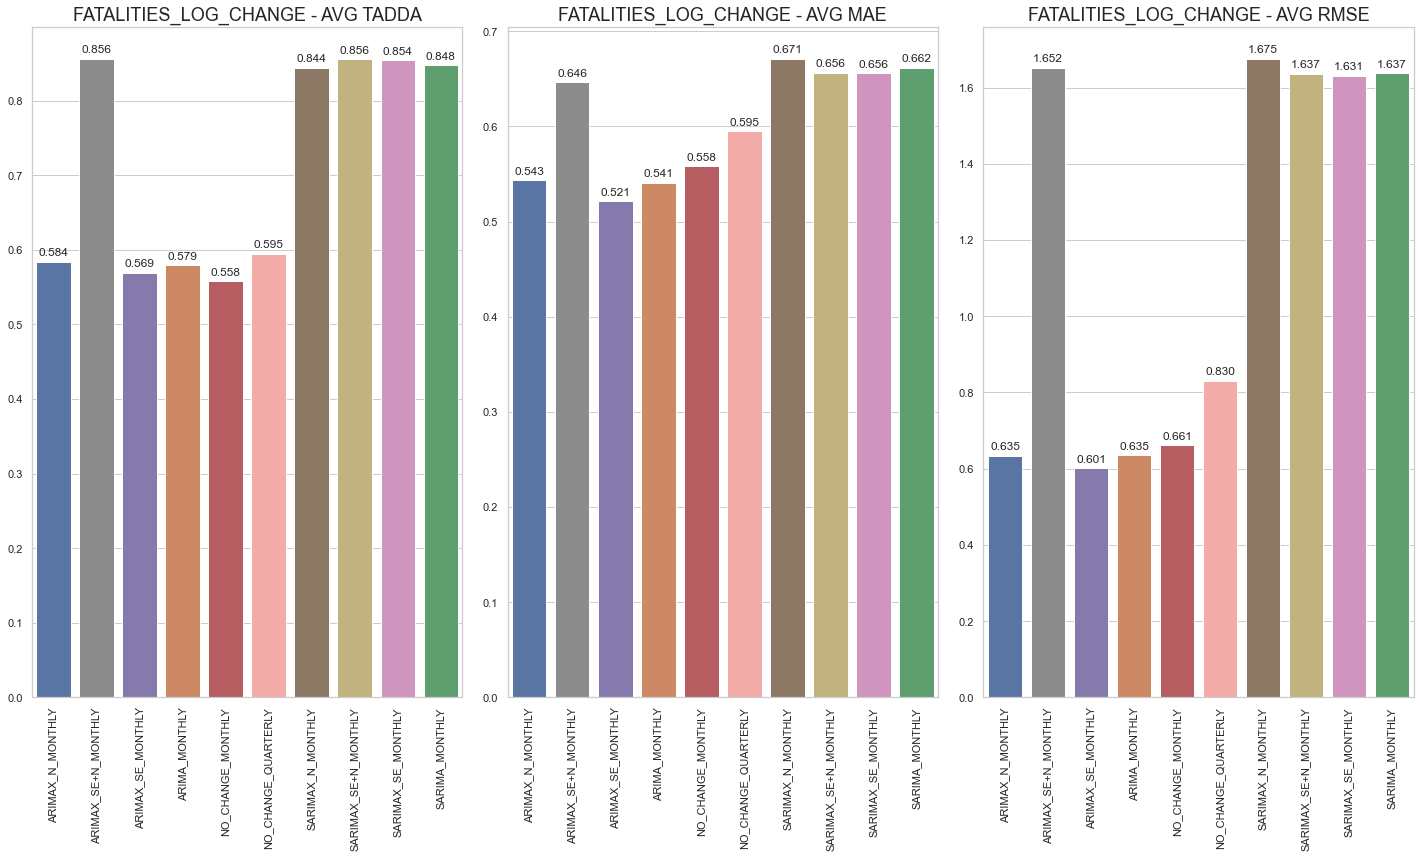

In [105]:
hcc_preds_total = hcc_preds.groupby("MODEL").mean().reset_index()
fig = plot_total_loss(hcc_preds_total, DEP_VAR, MONTHLY_MODELS, METRICS, models_color_palette)

#### -->arima models are not significantly better in high conflict countries than the no change model 

### Heatmap: Predictability by Country Category

In [106]:
predictions_by_country_nochange_monthly['COUNTRY_CATEGORY'] = ['LOW_CONFLICT' if x in LOW_CONFLICT_COUNTRIES else ('HIGH_CONFLICT' if x in HIGH_CONFLICT_COUNTRIES else "NO_CONFLICT") for x in predictions_by_country_nochange_monthly['GID_0']]
predictions_by_country_best_model['COUNTRY_CATEGORY'] = ['LOW_CONFLICT' if x in LOW_CONFLICT_COUNTRIES else ('HIGH_CONFLICT' if x in HIGH_CONFLICT_COUNTRIES else "NO_CONFLICT") for x in predictions_by_country_best_model['GID_0']]
predictions_by_country_sarimax['COUNTRY_CATEGORY'] = ['LOW_CONFLICT' if x in LOW_CONFLICT_COUNTRIES else ('HIGH_CONFLICT' if x in HIGH_CONFLICT_COUNTRIES else "NO_CONFLICT") for x in predictions_by_country_sarimax['GID_0']]

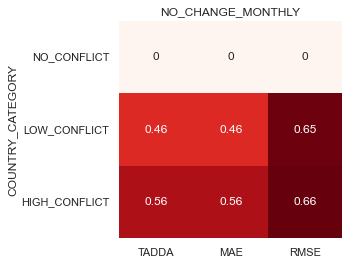

In [107]:
predictions_by_country_cat_nochange_monthly = predictions_by_country_nochange_monthly[["COUNTRY_CATEGORY"]+METRICS].groupby("COUNTRY_CATEGORY").mean()
predictions_by_country_cat_nochange_monthly.index = pd.CategoricalIndex(predictions_by_country_cat_nochange_monthly.index, categories= ["NO_CONFLICT", "LOW_CONFLICT", "HIGH_CONFLICT"])
predictions_by_country_cat_nochange_monthly.sort_index(level=0, inplace=True)

fig, ax = plt.subplots(figsize=(4,4))
center = predictions_by_country_cat_nochange_monthly["TADDA"].mean()
sns.heatmap(data=predictions_by_country_cat_nochange_monthly[METRICS], annot=True, cmap="Reds", cbar=False)
plt.title("NO_CHANGE_MONTHLY")
fig.savefig('../img/nochange_country_cat_error.svg',  bbox_inches="tight")

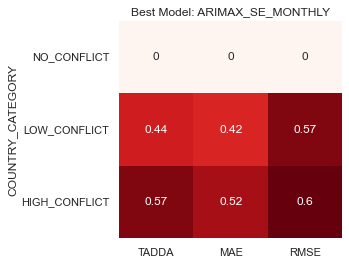

In [108]:
predictions_by_country_cat_best_model = predictions_by_country_best_model[["COUNTRY_CATEGORY"]+METRICS].groupby("COUNTRY_CATEGORY").mean()
predictions_by_country_cat_best_model.index = pd.CategoricalIndex(predictions_by_country_cat_best_model.index, categories= ["NO_CONFLICT", "LOW_CONFLICT", "HIGH_CONFLICT"])
predictions_by_country_cat_best_model.sort_index(level=0, inplace=True)

fig, ax = plt.subplots(figsize=(4,4))
center = predictions_by_country_cat_best_model["TADDA"].mean()
sns.heatmap(data=predictions_by_country_cat_best_model[METRICS], annot=True, cmap="Reds", cbar=False)
plt.title("Best Model: ARIMAX_SE_MONTHLY")
fig.savefig('../img/best_model_country_cat_error.svg',  bbox_inches="tight")

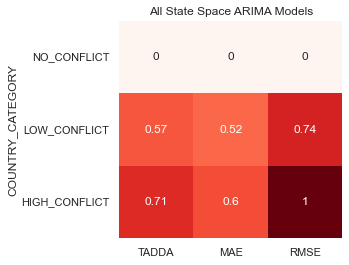

In [109]:
predictions_by_country_cat_sarimax = predictions_by_country_sarimax[["COUNTRY_CATEGORY"]+METRICS].groupby("COUNTRY_CATEGORY").mean()
predictions_by_country_cat_sarimax.index = pd.CategoricalIndex(predictions_by_country_cat_sarimax.index, categories= ["NO_CONFLICT", "LOW_CONFLICT", "HIGH_CONFLICT"])
predictions_by_country_cat_sarimax.sort_index(level=0, inplace=True)

fig, ax = plt.subplots(figsize=(4,4))
center = predictions_by_country_cat_sarimax["TADDA"].mean()
sns.heatmap(data=predictions_by_country_cat_sarimax[METRICS], annot=True, cmap="Reds", cbar=False)
plt.title("All State Space ARIMA Models")
fig.savefig('../img/sarimax_country_cat_error.svg',  bbox_inches="tight")

#### Correlation between LOG(average monthly fatalities) and prediction error

In [110]:
predictions_by_country_bm = predictions_by_country[predictions_by_country["MODEL"] == "ARIMAX_SE_MONTHLY"]
predictions_by_country_bm = predictions_by_country_bm[predictions_by_country_bm["GID_0"].isin(CONFLICT_COUNTRIES)]
predictions_by_country_bm

MODEL GID_0      FAT_PRED    FAT_ACTUAL  LC(FAT_PRED)  \
633  ARIMAX_SE_MONTHLY   AFG           NaN           NaN -2.011378e-02   
634  ARIMAX_SE_MONTHLY   AGO  1.474132e+02  1.576436e+04  1.332268e-14   
635  ARIMAX_SE_MONTHLY   ALB  0.000000e+00  1.431902e-01  0.000000e+00   
636  ARIMAX_SE_MONTHLY   ARE  0.000000e+00  1.590461e+00  0.000000e+00   
637  ARIMAX_SE_MONTHLY   ARG  2.292259e+00  3.541938e+01  5.430350e-02   
..                 ...   ...           ...           ...           ...   
785  ARIMAX_SE_MONTHLY   XKX  0.000000e+00  0.000000e+00  0.000000e+00   
786  ARIMAX_SE_MONTHLY   YEM           NaN           NaN  8.266263e-02   
787  ARIMAX_SE_MONTHLY   ZAF  5.320482e+11  4.210328e+30  4.440892e-16   
788  ARIMAX_SE_MONTHLY   ZMB  4.323722e+00  6.493347e+00 -1.160433e-01   
789  ARIMAX_SE_MONTHLY   ZWE  4.118660e+00  4.002908e+01 -1.306106e-01   

     LC(FAT_ACTUAL)     TADDA       MAE      RMSE  FAT_PRED_STD  ...  \
633       -0.917136  1.618997  1.609103  3.523190           NaN  ...   
634       -0.332996  0.678408  0.678408  0.689837      0.000000  ...   
635        0.057762  0.057762  0.057762  0.040038      0.000000  ...   
636        0.115525  0.115525  0.115525  0.160151      0.000000  ...   
637       -0.140810  0.578384  0.539957  0.411285      1.150715  ...   
..              ...       ...       ...       ...           ...  ...   
785        0.000000  0.000000  0.000000  0.000000      0.000000  ...   
786       -0.161455  0.349373  0.300449  0.127688           NaN  ...   
787       -0.150902  0.363075  0.363075  0.214652      0.000000  ...   
788       -0.516553  0.570457  0.560923  0.456942      0.191195  ...   
789       -0.354393  0.582737  0.560637  0.449719      0.096347  ...   

     SUM(COUNT_SRZ)_STD_NORM  SUM(COUNT_STRA)_STD_NORM  \
633                 0.380168                  0.601867   
634                 2.796263                  2.692031   
635                 1.531510                  2.239980   
636                 6.943714                  4.060562   
637                 0.872787                  1.349712   
..                       ...                       ...   
785                 1.351211                  1.430058   
786                 0.255083                  0.908743   
787                 1.072939                  2.428630   
788                 1.597191                  4.476447   
789                 1.683985                  2.672966   

     SUM(FATALITIES_PRO)_STD_NORM  SUM(FATALITIES_SRZ)_STD_NORM  \
633                      2.085905                      0.536513   
634                      8.676579                      7.183206   
635                           NaN                      4.948717   
636                           NaN                      7.874008   
637                      2.035834                      1.287697   
..                            ...                           ...   
785                           NaN                      4.255848   
786                      3.022727                      0.412539   
787                      1.562941                      1.277677   
788                      4.423281                      3.751638   
789                      4.049817                      3.454105   

     SUM(FATALITIES_STRA)_STD_NORM        UNREGION1  UNREGION2  \
633                       0.852263    Southern Asia       Asia   
634                            NaN    Middle Africa     Africa   
635                            NaN  Southern Europe     Europe   
636                            NaN     Western Asia       Asia   
637                            NaN    South America   Americas   
..                             ...              ...        ...   
785                            NaN  Southern Europe     Europe   
786                       1.953695     Western Asia       Asia   
787                            NaN  Southern Africa     Africa   
788                            NaN   Eastern Africa     Africa   
789                            NaN 

low positive 

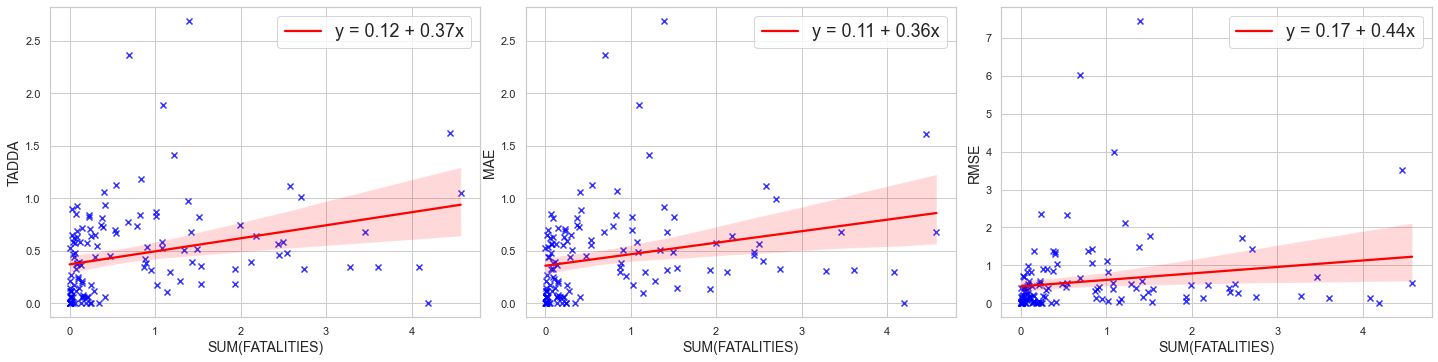

In [111]:
x = np.log(predictions_by_country_bm["SUM(FATALITIES)/POP"]+1)
# x = predictions_by_country_bm["SUM(FATALITIES)/POP"]

sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
plt.tight_layout()

for i, m in enumerate(METRICS):
    y = predictions_by_country_bm[m]

    # get coeffs of linear fit
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])

    sns.regplot(x = x,y = y, marker="x", ci=95, seed=0, color="r",
               line_kws={'label':"y = {1:.2f} + {0:.2f}x".format(intercept, slope), "color": "red"},
               scatter_kws={"color": "blue"}, ax=ax[i])
    ax[i].legend(fontsize=18)
    ax[i].set_ylabel(m, fontsize=14)
    ax[i].set_xlabel("SUM(FATALITIES)", fontsize=14)

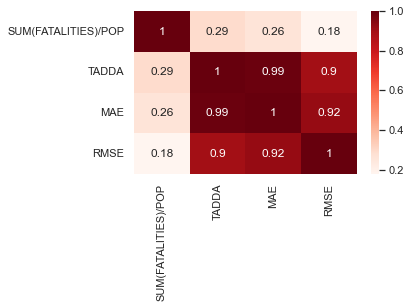

In [112]:
corr_table = predictions_by_country_bm[["SUM(FATALITIES)/POP"]+METRICS]
corr_table["SUM(FATALITIES)/POP"] = np.log(corr_table["SUM(FATALITIES)/POP"] + 1)
corr_table = corr_table.corr()

fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(data=corr_table, annot=True, cmap="Reds")
fig.savefig('../img/fat_per_pop_error_corr.svg',  bbox_inches="tight")

### 2.5 Countries with a high volatility in conflict fatalities are harder too predict

#### Correlation between LOG(average standard devaition of monthly fatalities) and prediction error

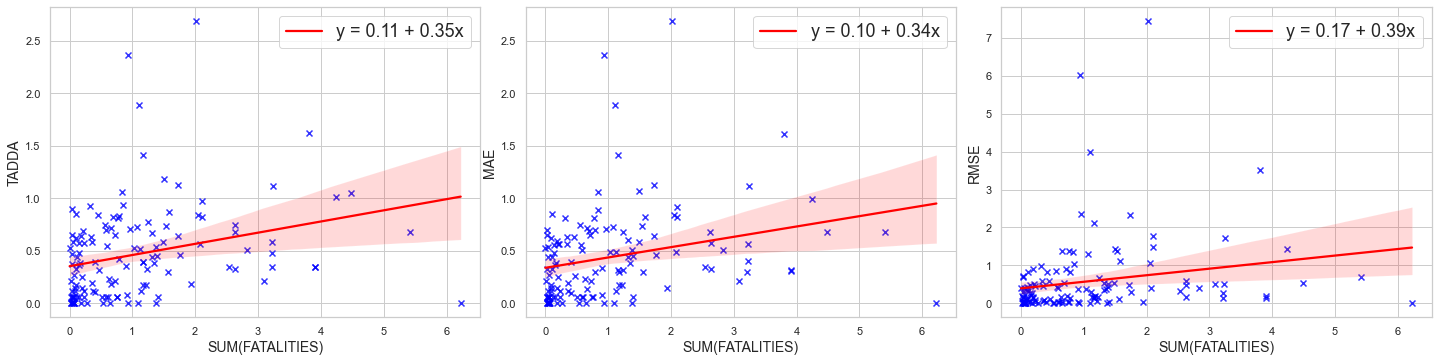

In [113]:
x = np.log(predictions_by_country_bm["SUM(FATALITIES)/POP_STD"]+1)

sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
plt.tight_layout()

for i, m in enumerate(METRICS):
    y = predictions_by_country_bm[m]

    # get coeffs of linear fit
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])

    sns.regplot(x = x,y = y, marker="x", ci=95, seed=0, color="r",
               line_kws={'label':"y = {1:.2f} + {0:.2f}x".format(intercept, slope), "color": "red"},
               scatter_kws={"color": "blue"}, ax=ax[i])
    ax[i].legend(fontsize=18)
    ax[i].set_ylabel(m, fontsize=14)
    ax[i].set_xlabel("SUM(FATALITIES)", fontsize=14)

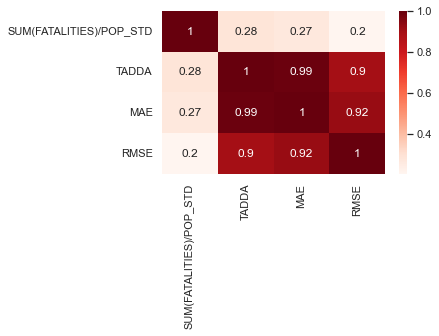

In [114]:
corr_table2 = predictions_by_country_bm[["SUM(FATALITIES)/POP_STD"]+METRICS]
corr_table2["SUM(FATALITIES)/POP_STD"] = np.log(corr_table2["SUM(FATALITIES)/POP_STD"] + 1)
corr_table2 = corr_table2.corr()

fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(data=corr_table2, annot=True, cmap="Reds")
fig.savefig('../img/fat_per_pop_std_error_corr.svg',  bbox_inches="tight")

### 2.7 No-Change model can be outperformed for the one-step ahead forecasts

In [115]:
# monthly models
one_step_forecast_monthly = predictions_by_month[predictions_by_month["MONTH"] == "2021-03-01"]

#quarterly models
one_step_forecast_quarterly = predictions_by_month[predictions_by_month["MONTH"] == "2021-04-01"]
one_step_forecast_quarterly = one_step_forecast_quarterly[one_step_forecast_quarterly["MODEL"].isin(QUARTERLY_MODELS)]

# combined
one_step_forecast = pd.concat([one_step_forecast_monthly, one_step_forecast_quarterly])
one_step_forecast

MODEL      MONTH    FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  \
0          ARIMAX_N_MONTHLY 2021-03-01         NaN         NaN      0.017424   
16      ARIMAX_SE+N_MONTHLY 2021-03-01         NaN         NaN      0.030381   
32        ARIMAX_SE_MONTHLY 2021-03-01         NaN         NaN      0.003648   
48            ARIMA_MONTHLY 2021-03-01         NaN         NaN      0.005294   
64        NO_CHANGE_MONTHLY 2021-03-01   64.424051   76.126582      0.000000   
80        SARIMAX_N_MONTHLY 2021-03-01         NaN         NaN      0.053985   
96     SARIMAX_SE+N_MONTHLY 2021-03-01         NaN         NaN      0.048020   
112      SARIMAX_SE_MONTHLY 2021-03-01         NaN         NaN      0.054153   
128          SARIMA_MONTHLY 2021-03-01         NaN         NaN      0.052174   
0         AVG_MODEL_MONTHLY 2021-03-01         NaN         NaN      0.033135   
12       ARIMAX_N_QUARTERLY 2021-04-01         NaN         NaN     -0.048200   
28    ARIMAX_SE+N_QUARTERLY 2021-04-01         NaN         NaN     -0.034208   
44      ARIMAX_SE_QUARTERLY 2021-04-01         NaN         NaN     -0.035428   
60          ARIMA_QUARTERLY 2021-04-01         NaN         NaN     -0.037159   
76      NO_CHANGE_QUARTERLY 2021-04-01  208.398734  284.911392      0.000000   
92      SARIMAX_N_QUARTERLY 2021-04-01         NaN         NaN      0.060517   
108  SARIMAX_SE+N_QUARTERLY 2021-04-01         NaN         NaN      0.003162   
124    SARIMAX_SE_QUARTERLY 2021-04-01         NaN         NaN      0.013967   
140        SARIMA_QUARTERLY 2021-04-01         NaN         NaN      0.003295   

     LC(FAT_ACTUAL)     TADDA       MAE      RMSE  FAT_PRED_STD  \
0          0.061379  0.318036  0.300454  0.563811           NaN   
16         0.061379  0.337486  0.311254  0.605375           NaN   
32         0.061379  0.309829  0.295894  0.555676           NaN   
48         0.061379  0.303547  0.292196  0.561941           NaN   
64         0.061379  0.319135  0.319135  0.592782    279.850422   
80         0.061379  0.368893  0.335273  0.611787           NaN   
96         0.061379  0.344266  0.313744  0.573944           NaN   
112        0.061379  0.373850  0.337306  0.612948           NaN   
128        0.061379  0.355740  0.324484  0.596125           NaN   
0          0.061379  0.338956  0.313826  0.342960           NaN   
12         0.154380  0.475748  0.432833  0.785983           NaN   
28         0.154380  0.475451  0.424801  0.791984           NaN   
44         0.154380  0.463763  0.422995  0.803554           NaN   
60         0.154380  0.446533  0.414097  0.797045           NaN   
76         0.154380  0.456406  0.456406  0.823801    850.660036   
92         0.154380  0.549137  0.456966  0.867116           NaN   
108        0.154380  0.503476  0.447340  0.795712           NaN   
124        0.154380  0.519858  0.457993  0.835483           NaN   
140        0.154380  0.481898  0.428798  0.817779           NaN   

     FAT_ACTUAL_STD  LC(FAT_PRED)_STD  LC(FAT_ACTUAL)_STD  
0               NaN          0.310176            0.591470  
16              NaN          0.313857            0.591470  
32              NaN          0.277438            0.591470  
48              NaN          0.248574            0.591470  
64       308.501200          0.000000            0.591470  
80              NaN          0.444491            0.591470  
96              NaN          0.393628            0.591470  
112             NaN          0.454258            0.591470  
128             NaN          0.422658            0.591470  
0               NaN          0.310176            0.591470  
12              NaN          0.408511            0.811779  
28              NaN          0.459559            0.811779  
44              NaN          0.413756            0.811779  
60              NaN          0.370016            0.811779  
76      1552.417287          0.000000            0.811779  
92              NaN          0.623631            0.811779  
108             NaN          0.519707            0.811779  


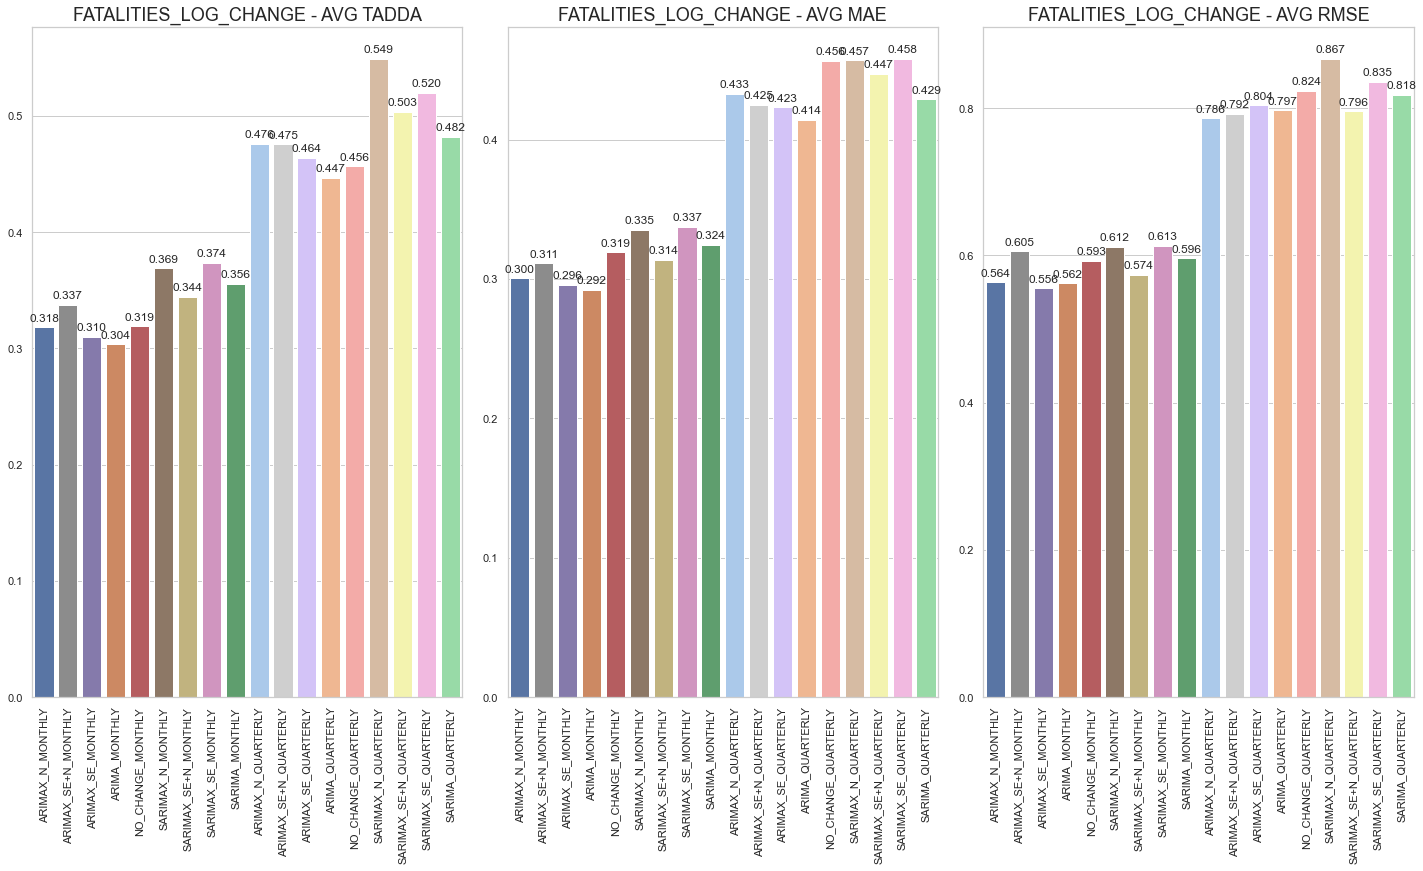

In [116]:
fig = plot_total_loss(one_step_forecast, DEP_VAR, MODELS, METRICS, models_color_palette)
fig.savefig('../img/first_period_error.svg',  bbox_inches="tight")

In [117]:
predictions_by_month_monthly = predictions_by_month[predictions_by_month["MODEL"].isin(MONTHLY_MODELS)]
predictions_by_month_monthly = predictions_by_month_monthly.groupby(["MONTH"]).mean()

predictions_by_month_monthly

FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  LC(FAT_ACTUAL)     TADDA  \
MONTH                                                                       
2021-03-01  64.424051   76.126582      0.029453        0.061379  0.336754   
2021-04-01  64.424051   79.455696      0.026680        0.140334  0.354252   
2021-05-01  64.424051   95.962025      0.046499        0.207194  0.411507   
2021-06-01  64.424051  109.493671      0.031342        0.114474  0.428355   
2021-07-01  64.424051  111.151899      0.035665        0.093347  0.378396   
2021-08-01  64.424051   98.664557      0.033975        0.116437  0.403282   
2021-09-01  64.424051   52.765823      0.034443        0.062243  0.394119   
2021-10-01  64.424051   57.708861      0.055597        0.087865  0.494314   
2021-11-01  64.424051   65.670886      0.047230        0.072542  0.477547   
2021-12-01  64.424051   62.867089      0.015469        0.122183  0.437083   
2022-01-01  64.424051   68.512658      0.022934        0.107152  0.485108   
2022-02-01  64.424051   36.341772      0.013688       -0.153314  0.451934   

                 MAE      RMSE  FAT_PRED_STD  FAT_ACTUAL_STD  \
MONTH                                                          
2021-03-01  0.314415  0.586043    279.850422      308.501200   
2021-04-01  0.323670  0.654675    279.850422      341.164260   
2021-05-01  0.370218  0.739692    279.850422      530.866026   
2021-06-01  0.393189  0.725067    279.850422      698.827706   
2021-07-01  0.341840  0.656525    279.850422      716.140240   
2021-08-01  0.377411  0.675644    279.850422      510.228706   
2021-09-01  0.361050  0.757276    279.850422      173.399071   
2021-10-01  0.453018  0.890212    279.850422      206.036120   
2021-11-01  0.436342  0.890888    279.850422      251.951958   
2021-12-01  0.403923  0.753531    279.850422      236.526055   
2022-01-01  0.458051  0.893982    279.850422      249.505338   
2022-02-01  0.422497  0.776734    279.850422      132.563109   

            LC(FAT_PRED)_STD  LC(FAT_ACTUAL)_STD  
MONTH                                             
2021-03-01          0.318342            0.591470  
2021-04-01          0.310556            0.628316  
2021-05-01          0.374805            0.709760  
2021-06-01          0.350178            0.724793  
2021-07-01          0.375887            0.638768  
2021-08-01          0.342198            0.706345  
2021-09-01          0.428971            0.671030  
2021-10-01          0.519167            0.775411  
2021-11-01          0.484544            0.805882  
2021-12-01          0.349646            0.765017  
2022-01-01          0.331075            0.888241  
2022-02-01          0.320585            0.760840

In [118]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data=predictions_by_month_monthly[METRICS].T, fmt=".2f", annot=True, cmap="RdYlGn_r" ax=ax)
ax.set_xticklabels(predictions_by_month_monthly['MONTH'].dt.strftime('%d-%m-%Y'))

fig.savefig('../img/monthly_period_avg_errors.svg',  bbox_inches="tight")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2914435411.py, line 2)